In [4]:
# ========================================
# STEP 1: CHECK CURRENT DIRECTORY
# ========================================

import os

print("Current directory:", os.getcwd())
print("\nFiles/folders in current directory:")
for item in os.listdir('.'):
    if os.path.isdir(item):
        print(f"  {item}/")
    else:
        print(f"  {item}")

Current directory: /content

Files/folders in current directory:
  .config/
  sample_data/


In [5]:
# ========================================
# STEP 2: UPLOAD AND EXTRACT
# ========================================

from google.colab import files
import zipfile
import os

# Upload the file
print("Please upload dev_phase.zip:")
uploaded = files.upload()

# Check what was uploaded
print("\nUploaded files:")
for filename in uploaded.keys():
    print(f"  {filename} ({len(uploaded[filename])} bytes)")

# Extract the zip
print("\nExtracting...")
with zipfile.ZipFile('dev_phase.zip', 'r') as zip_ref:
    zip_ref.extractall('.')
    print(" Extracted!")

# Check what's there now
print("\nFiles/folders after extraction:")
for item in sorted(os.listdir('.')):
    if os.path.isdir(item):
        print(f"  {item}/")
    else:
        size = os.path.getsize(item)
        print(f"  {item} ({size:,} bytes)")

Please upload dev_phase.zip:


Saving dev_phase.zip to dev_phase.zip

Uploaded files:
  dev_phase.zip (18891917 bytes)

Extracting...
 Extracted!

Files/folders after extraction:
  .config/
  dev_phase.zip (18,891,917 bytes)
  sample_data/
  subtask1/
  subtask2/
  subtask3/


In [6]:
# ========================================
# STEP 3: EXPLORE ALL SUBTASKS
# ========================================

import os

print("="*70)
print("FOLDER STRUCTURE")
print("="*70)

# Check each subtask
for subtask in ['subtask1', 'subtask2', 'subtask3']:
    if os.path.exists(subtask):
        print(f"\n{subtask}/")

        # List subfolders (train, dev, etc.)
        subfolders = sorted([f for f in os.listdir(subtask) if os.path.isdir(os.path.join(subtask, f))])

        for subfolder in subfolders:
            path = os.path.join(subtask, subfolder)
            files = [f for f in os.listdir(path) if f.endswith('.csv')]
            print(f"  {subfolder}/ -> {len(files)} CSV files")

FOLDER STRUCTURE

subtask1/
  dev/ -> 22 CSV files
  train/ -> 22 CSV files

subtask2/
  dev/ -> 22 CSV files
  train/ -> 22 CSV files

subtask3/
  dev/ -> 18 CSV files
  train/ -> 18 CSV files


In [7]:
# ========================================
# STEP 4: SUBTASK 1 DETAILED ANALYSIS
# ========================================

import pandas as pd

print("="*70)
print("SUBTASK 1 - ALL LANGUAGES")
print("="*70)

# List train files
train_path = 'subtask1/train/'
train_files = sorted([f for f in os.listdir(train_path) if f.endswith('.csv')])

print(f"\nTrain folder: {len(train_files)} languages")
print("\nLanguage files with sizes:")

for i, file in enumerate(train_files, 1):
    size = os.path.getsize(os.path.join(train_path, file)) / 1024
    print(f"{i:2d}. {file:<20} {size:>8.1f} KB")

# List dev files
dev_path = 'subtask1/dev/'
dev_files = sorted([f for f in os.listdir(dev_path) if f.endswith('.csv')])

print(f"\nDev folder: {len(dev_files)} languages")

SUBTASK 1 - ALL LANGUAGES

Train folder: 22 languages

Language files with sizes:
 1. amh.csv                 736.4 KB
 2. arb.csv                 702.0 KB
 3. ben.csv                1560.3 KB
 4. deu.csv                 487.8 KB
 5. eng.csv                 363.1 KB
 6. fas.csv                 698.4 KB
 7. hau.csv                 546.4 KB
 8. hin.csv                 990.9 KB
 9. ita.csv                 606.2 KB
10. khm.csv                3229.5 KB
11. mya.csv                 979.2 KB
12. nep.csv                 631.7 KB
13. ori.csv                 814.3 KB
14. pan.csv                 242.6 KB
15. pol.csv                 322.2 KB
16. rus.csv                1036.1 KB
17. spa.csv                 331.4 KB
18. swa.csv                 817.1 KB
19. tel.csv                 708.2 KB
20. tur.csv                 495.8 KB
21. urd.csv                 708.9 KB
22. zho.csv                 580.6 KB

Dev folder: 22 languages


In [8]:
# ========================================
# STEP 5: EXAMINE TURKISH DATA
# ========================================

import pandas as pd

# Load Turkish train data
tur_train = pd.read_csv('subtask1/train/tur.csv')

print("="*70)
print("TURKISH TRAINING DATA")
print("="*70)

print(f"\nColumns: {tur_train.columns.tolist()}")
print(f"Total rows: {len(tur_train)}")
print(f"\nFirst 5 examples:")
print(tur_train.head())

print(f"\nLabel distribution:")
print(tur_train['polarization'].value_counts())

print(f"\nClass balance:")
polarized_pct = (tur_train['polarization'] == 1).mean() * 100
print(f"Polarized: {polarized_pct:.1f}%")
print(f"Non-polarized: {100-polarized_pct:.1f}%")

# Load Turkish dev data
tur_dev = pd.read_csv('subtask1/dev/tur.csv')

print(f"\n{'='*70}")
print("TURKISH DEV DATA")
print("="*70)
print(f"Total rows: {len(tur_dev)}")
print(f"Label distribution:")
print(tur_dev['polarization'].value_counts())

TURKISH TRAINING DATA

Columns: ['id', 'text', 'polarization']
Total rows: 2364

First 5 examples:
                                     id  \
0  tur_153d607a6d1a1130e696a94db6588075   
1  tur_67a124df33f922df9430d8510716173f   
2  tur_0b8d62766d1198185bda9f3940e2d121   
3  tur_8dd79022466fdf77e3fa9250da119c7f   
4  tur_3b7bb72b32f8cf999aa5df88290bbb6e   

                                                text  polarization  
0  Çıldırmam an meselesi Ben eskiden dövme yaptır...             0  
1  2 Yurtlarını işgal ettiği mazlum v e masum Fil...             1  
2  @USER Bereket Versin. İHA’ dan ateş edildiğind...             0  
3  @USER @USER Hahaha ne kadar komik. O para için...             0  
4  @USER @USER En azından senin gibi göt yalayici...             1  

Label distribution:
polarization
0    1209
1    1155
Name: count, dtype: int64

Class balance:
Polarized: 48.9%
Non-polarized: 51.1%

TURKISH DEV DATA
Total rows: 115
Label distribution:
Series([], Name: count, dtype: int64)


In [9]:
# ========================================
# STEP 6: STATISTICS FOR ALL LANGUAGES
# ========================================

import pandas as pd

stats = []

# Loop through all train files
for file in sorted(os.listdir('subtask1/train/')):
    if file.endswith('.csv'):
        lang_code = file.replace('.csv', '')

        # Load train and dev
        train_df = pd.read_csv(f'subtask1/train/{file}')
        dev_df = pd.read_csv(f'subtask1/dev/{file}')

        # Calculate statistics
        stats.append({
            'language': lang_code,
            'train_samples': len(train_df),
            'dev_samples': len(dev_df),
            'train_polarized': (train_df['polarization'] == 1).sum(),
            'train_non_polarized': (train_df['polarization'] == 0).sum(),
            'polarization_rate': (train_df['polarization'] == 1).mean(),
            'avg_text_length': train_df['text'].str.len().mean()
        })

# Create DataFrame
stats_df = pd.DataFrame(stats)

print("="*90)
print("ALL LANGUAGES STATISTICS")
print("="*90)
print(stats_df.to_string(index=False))



ALL LANGUAGES STATISTICS
language  train_samples  dev_samples  train_polarized  train_non_polarized  polarization_rate  avg_text_length
     amh           3332          166             2518                  814           0.755702        76.070828
     arb           3380          169             1512                 1868           0.447337        94.758580
     ben           3333          166             1424                 1909           0.427243       165.215722
     deu           3180          159             1512                 1668           0.475472       113.956289
     eng           3222          160             1175                 2047           0.364680        74.777778
     fas           3295          164             2440                  855           0.740516        98.000303
     hau           3651          182              392                 3259           0.107368       109.586962
     hin           2744          137             2346                  398           0.

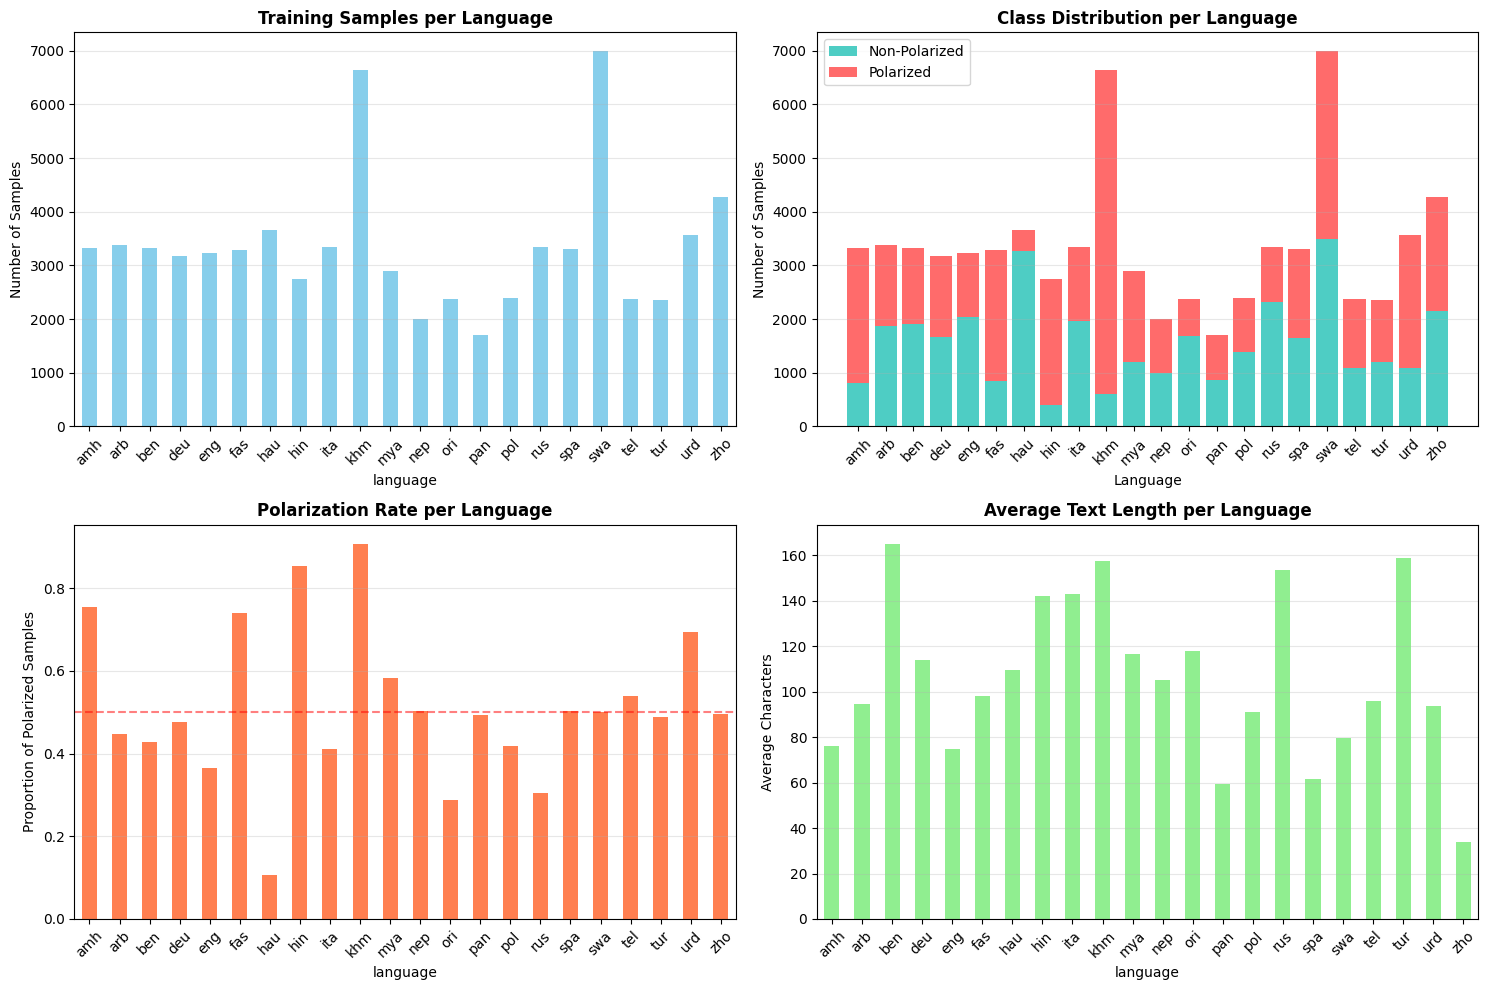

In [10]:
# ========================================
# STEP 7: VISUALIZATIONS
# ========================================

%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

ax1 = axes[0, 0]
stats_df.plot(
    x='language', y='train_samples', kind='bar', ax=ax1,
    color='skyblue', legend=False
)
ax1.set_title('Training Samples per Language', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Samples')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

ax2 = axes[0, 1]
x_pos = range(len(stats_df))
ax2.bar(x_pos, stats_df['train_non_polarized'], label='Non-Polarized', color='#4ecdc4')
ax2.bar(
    x_pos, stats_df['train_polarized'],
    bottom=stats_df['train_non_polarized'],
    label='Polarized', color='#ff6b6b'
)
ax2.set_title('Class Distribution per Language', fontsize=12, fontweight='bold')
ax2.set_xlabel('Language')
ax2.set_ylabel('Number of Samples')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(stats_df['language'], rotation=45)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

ax3 = axes[1, 0]
stats_df.plot(
    x='language', y='polarization_rate', kind='bar',
    ax=ax3, color='coral', legend=False
)
ax3.set_title('Polarization Rate per Language', fontsize=12, fontweight='bold')
ax3.set_ylabel('Proportion of Polarized Samples')
ax3.tick_params(axis='x', rotation=45)
ax3.axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
ax3.grid(axis='y', alpha=0.3)

ax4 = axes[1, 1]
stats_df.plot(
    x='language', y='avg_text_length', kind='bar',
    ax=ax4, color='lightgreen', legend=False
)
ax4.set_title('Average Text Length per Language', fontsize=12, fontweight='bold')
ax4.set_ylabel('Average Characters')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y', alpha=0.3)

fig.tight_layout()
plt.show()


In [11]:
# ========================================
# STEP 8: SAMPLE DATA FROM DIFFERENT LANGUAGES
# ========================================

import pandas as pd

languages_to_check = ['eng', 'deu', 'arb', 'hin']

for lang in languages_to_check:
    print("="*70)
    print(f"{lang.upper()} - SAMPLE DATA")
    print("="*70)

    df = pd.read_csv(f'subtask1/train/{lang}.csv')
    print(f"Columns: {df.columns.tolist()}")
    print(f"\nFirst 2 examples:")
    for idx, row in df.head(2).iterrows():
        print(f"\nExample {idx+1}:")
        print(f"  Text: {row['text'][:100]}...")
        print(f"  Label: {row['polarization']} ({'Polarized' if row['polarization']==1 else 'Non-polarized'})")
    print()

ENG - SAMPLE DATA
Columns: ['id', 'text', 'polarization']

First 2 examples:

Example 1:
  Text:  is defending imperialism in the dnd chat...
  Label: 0 (Non-polarized)

Example 2:
  Text: Still playing with this. I am now following Rachel Maddie from msnbc....
  Label: 0 (Non-polarized)

DEU - SAMPLE DATA
Columns: ['id', 'text', 'polarization']

First 2 examples:

Example 1:
  Text: Natürlich bin ich linksgrün - ich habe Herz u n d ...
  Label: 0 (Non-polarized)

Example 2:
  Text: Schuld sind Habeck,  die grünen und diese linksgrün versifften Wokemenschen.

Die Spahnplatte ist so...
  Label: 1 (Polarized)

ARB - SAMPLE DATA
Columns: ['id', 'text', 'polarization']

First 2 examples:

Example 1:
  Text: احلام انتي ونعالي ومنو انتي حتى تقيمين الفنانين الملكه احلام هههههههه البقره احلام بابا عوفي الفن لا...
  Label: 1 (Polarized)

Example 2:
  Text: وره الكواليس تنيجج من وره بعير صطناعي على فكرة احﻻم رجل مو مره لهن تخيل على البنات الحلويات هههههههه...
  Label: 1 (Polarized)

HIN - SAMPLE

In [12]:
# ========================================
# STEP 9: COMPLETE STATISTICS FOR 22 LANGUAGES
# ========================================

import pandas as pd

stats = []

for file in sorted(os.listdir('subtask1/train/')):
    if file.endswith('.csv'):
        lang_code = file.replace('.csv', '')

        # Load data
        train_df = pd.read_csv(f'subtask1/train/{file}')
        dev_df = pd.read_csv(f'subtask1/dev/{file}')

        # Calculate statistics
        stats.append({
            'Language': lang_code,
            'Train_Samples': len(train_df),
            'Dev_Samples': len(dev_df),
            'Total_Samples': len(train_df) + len(dev_df),
            'Train_Polarized': (train_df['polarization'] == 1).sum(),
            'Train_NonPolarized': (train_df['polarization'] == 0).sum(),
            'Polarization_Rate': f"{(train_df['polarization'] == 1).mean():.2%}",
            'Avg_Text_Length': f"{train_df['text'].str.len().mean():.0f}"
        })

# Create DataFrame and sort by train samples
stats_df = pd.DataFrame(stats)
stats_df_sorted = stats_df.sort_values('Train_Samples', ascending=False)

print("="*90)
print("COMPLETE STATISTICS - SORTED BY TRAINING SAMPLES")
print("="*90)
print(stats_df_sorted.to_string(index=False))

# Summary statistics
total_train = stats_df['Train_Samples'].sum()
total_dev = stats_df['Dev_Samples'].sum()

print("\n" + "="*90)
print("SUMMARY")
print("="*90)
print(f"Total languages: {len(stats_df)}")
print(f"Total training samples: {total_train:,}")
print(f"Total dev samples: {total_dev:,}")
print(f"Total samples: {total_train + total_dev:,}")
print(f"Average samples per language: {total_train / len(stats_df):.0f}")

COMPLETE STATISTICS - SORTED BY TRAINING SAMPLES
Language  Train_Samples  Dev_Samples  Total_Samples  Train_Polarized  Train_NonPolarized Polarization_Rate Avg_Text_Length
     swa           6991          349           7340             3504                3487            50.12%              80
     khm           6640          332           6972             6029                 611            90.80%             157
     zho           4280          214           4494             2121                2159            49.56%              34
     hau           3651          182           3833              392                3259            10.74%             110
     urd           3563          177           3740             2476                1087            69.49%              94
     arb           3380          169           3549             1512                1868            44.73%              95
     rus           3348          167           3515             1023                2325  

In [13]:
# ========================================
# STEP 10: LANGUAGE GROUPING
# ========================================

# Convert to numeric for grouping
stats_df['Train_Samples_Numeric'] = pd.to_numeric(stats_df['Train_Samples'])

# Define thresholds based on your data
high_threshold = stats_df['Train_Samples_Numeric'].quantile(0.67)  # Top 33%
low_threshold = stats_df['Train_Samples_Numeric'].quantile(0.33)   # Bottom 33%

high_resource = stats_df[stats_df['Train_Samples_Numeric'] >= high_threshold]['Language'].tolist()
medium_resource = stats_df[(stats_df['Train_Samples_Numeric'] >= low_threshold) &
                           (stats_df['Train_Samples_Numeric'] < high_threshold)]['Language'].tolist()
low_resource = stats_df[stats_df['Train_Samples_Numeric'] < low_threshold]['Language'].tolist()

print("="*70)
print("LANGUAGE GROUPING BY RESOURCE LEVEL")
print("="*70)

print(f"\nHigh-resource ({len(high_resource)} languages):")
for lang in high_resource:
    samples = stats_df[stats_df['Language']==lang]['Train_Samples'].values[0]
    print(f"  {lang}: {samples} samples")

print(f"\nMedium-resource ({len(medium_resource)} languages):")
for lang in medium_resource:
    samples = stats_df[stats_df['Language']==lang]['Train_Samples'].values[0]
    print(f"  {lang}: {samples} samples")

print(f"\nLow-resource ({len(low_resource)} languages):")
for lang in low_resource:
    samples = stats_df[stats_df['Language']==lang]['Train_Samples'].values[0]
    print(f"  {lang}: {samples} samples")

LANGUAGE GROUPING BY RESOURCE LEVEL

High-resource (7 languages):
  arb: 3380 samples
  hau: 3651 samples
  khm: 6640 samples
  rus: 3348 samples
  swa: 6991 samples
  urd: 3563 samples
  zho: 4280 samples

Medium-resource (8 languages):
  amh: 3332 samples
  ben: 3333 samples
  deu: 3180 samples
  eng: 3222 samples
  fas: 3295 samples
  ita: 3334 samples
  mya: 2889 samples
  spa: 3305 samples

Low-resource (7 languages):
  hin: 2744 samples
  nep: 2005 samples
  ori: 2368 samples
  pan: 1700 samples
  pol: 2391 samples
  tel: 2366 samples
  tur: 2364 samples


In [14]:
# ========================================
# STEP 11: CLASS BALANCE ANALYSIS
# ========================================

print("="*70)
print("CLASS BALANCE PER LANGUAGE")
print("="*70)

for file in sorted(os.listdir('subtask1/train/')):
    if file.endswith('.csv'):
        lang = file.replace('.csv', '')
        df = pd.read_csv(f'subtask1/train/{file}')

        total = len(df)
        polarized = (df['polarization'] == 1).sum()
        non_polarized = (df['polarization'] == 0).sum()
        balance = polarized / total

        status = 'BALANCED'
        if balance < 0.3:
            status = 'HEAVILY NON-POLARIZED'
        elif balance > 0.7:
            status = 'HEAVILY POLARIZED'
        elif balance < 0.4 or balance > 0.6:
            status = 'SLIGHTLY IMBALANCED'

        print(f"{lang}: {polarized:>5} polarized ({balance:>5.1%}), " +
              f"{non_polarized:>5} non-polarized ({1-balance:>5.1%}) - {status}")

CLASS BALANCE PER LANGUAGE
amh:  2518 polarized (75.6%),   814 non-polarized (24.4%) - HEAVILY POLARIZED
arb:  1512 polarized (44.7%),  1868 non-polarized (55.3%) - BALANCED
ben:  1424 polarized (42.7%),  1909 non-polarized (57.3%) - BALANCED
deu:  1512 polarized (47.5%),  1668 non-polarized (52.5%) - BALANCED
eng:  1175 polarized (36.5%),  2047 non-polarized (63.5%) - SLIGHTLY IMBALANCED
fas:  2440 polarized (74.1%),   855 non-polarized (25.9%) - HEAVILY POLARIZED
hau:   392 polarized (10.7%),  3259 non-polarized (89.3%) - HEAVILY NON-POLARIZED
hin:  2346 polarized (85.5%),   398 non-polarized (14.5%) - HEAVILY POLARIZED
ita:  1368 polarized (41.0%),  1966 non-polarized (59.0%) - BALANCED
khm:  6029 polarized (90.8%),   611 non-polarized ( 9.2%) - HEAVILY POLARIZED
mya:  1682 polarized (58.2%),  1207 non-polarized (41.8%) - BALANCED
nep:  1008 polarized (50.3%),   997 non-polarized (49.7%) - BALANCED
ori:   683 polarized (28.8%),  1685 non-polarized (71.2%) - HEAVILY NON-POLARIZED
pan

In [15]:
# ========================================
# STEP 12: CHECK RAW DATA QUALITY
# ========================================

import pandas as pd

def inspect_data(lang='tur'):
    """
    Inspect data quality for a language
    """
    print("="*70)
    print(f"DATA INSPECTION: {lang.upper()}")
    print("="*70)

    # Load train
    train_df = pd.read_csv(f'subtask1/train/{lang}.csv')
    print(f"\nTRAIN DATA:")
    print(f"  Total rows: {len(train_df)}")
    print(f"  Columns: {train_df.columns.tolist()}")

    # Check for missing values
    print(f"\n  Missing values:")
    print(train_df.isnull().sum())

    # Check polarization column
    print(f"\n  Polarization distribution:")
    print(train_df['polarization'].value_counts())
    print(f"  Unique values: {train_df['polarization'].unique()}")

    # Check text column
    print(f"\n  Text stats:")
    print(f"    Empty strings: {(train_df['text'].str.strip() == '').sum()}")
    print(f"    Text length (mean): {train_df['text'].str.len().mean():.0f}")
    print(f"    Text length (min): {train_df['text'].str.len().min()}")
    print(f"    Text length (max): {train_df['text'].str.len().max()}")

    # Sample texts
    print(f"\n  Sample texts:")
    for i in range(min(3, len(train_df))):
        text = train_df.iloc[i]['text'][:80]
        label = train_df.iloc[i]['polarization']
        print(f"    [{label}] {text}...")

    # Load dev
    print(f"\n{'='*70}")
    dev_df = pd.read_csv(f'subtask1/dev/{lang}.csv')
    print(f"DEV DATA:")
    print(f"  Total rows: {len(dev_df)}")

    # Check for missing values
    print(f"\n  Missing values:")
    print(dev_df.isnull().sum())

    # Check polarization column
    print(f"\n  Polarization distribution:")
    print(dev_df['polarization'].value_counts(dropna=False))
    print(f"  Unique values (including NaN): {dev_df['polarization'].unique()}")

    # Check if there are NaN values
    nan_count = dev_df['polarization'].isna().sum()
    if nan_count > 0:
        print(f"\n  WARNING: {nan_count} NaN values in polarization column!")
        print(f"  Rows with NaN:")
        print(dev_df[dev_df['polarization'].isna()][['id', 'text', 'polarization']].head())

# Inspect Turkish data
inspect_data('tur')

# Also check English
print("\n" + "="*70)
inspect_data('eng')

DATA INSPECTION: TUR

TRAIN DATA:
  Total rows: 2364
  Columns: ['id', 'text', 'polarization']

  Missing values:
id              0
text            0
polarization    0
dtype: int64

  Polarization distribution:
polarization
0    1209
1    1155
Name: count, dtype: int64
  Unique values: [0 1]

  Text stats:
    Empty strings: 0
    Text length (mean): 159
    Text length (min): 23
    Text length (max): 292

  Sample texts:
    [0] Çıldırmam an meselesi Ben eskiden dövme yaptırmıştim ölünce hoca dövme olan yeri...
    [1] 2 Yurtlarını işgal ettiği mazlum v e masum Filistinlilere Devlet Terörü uygulama...
    [0] @USER Bereket Versin. İHA’ dan ateş edildiğinde hedefe varmayan Roket 🚀 utansın....

DEV DATA:
  Total rows: 115

  Missing values:
id                0
text              0
polarization    115
dtype: int64

  Polarization distribution:
polarization
NaN    115
Name: count, dtype: int64
  Unique values (including NaN): [nan]

  Rows with NaN:
                                     id

In [16]:
# ========================================
# STEP 13: PREPROCESSING FUNCTIONS
# ========================================

import re
import string

def preprocess_for_tfidf(text):
    """
    Aggressive preprocessing for TF-IDF baseline
    - Remove URLs, mentions, hashtags
    - Remove emojis
    - Lowercase
    - Remove extra punctuation
    """
    # Convert to string
    text = str(text)

    # Lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # Remove hashtag symbol but keep the text
    text = re.sub(r'#', '', text)

    # Remove emojis
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Remove extra punctuation (keep only basic ones)
    text = re.sub(r'[^\w\s.!?,]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove very short texts (optional)
    if len(text) < 3:
        return ""

    return text


def preprocess_for_transformer(text):
    """
    Light preprocessing for XLM-RoBERTa
    - Remove URLs, mentions
    - Keep emojis (transformers can learn from them)
    - Keep original case (important for transformers)
    - Keep punctuation (carries sentiment)
    """
    # Convert to string
    text = str(text)

    # Do NOT lowercase - transformers handle case

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # Remove hashtag symbol but keep text
    text = re.sub(r'#', '', text)

    # Keep emojis - they're informative for sentiment!
    # Keep punctuation - "!!!" means intensity
    # Keep case - "HATE" vs "hate"

    # Only remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text


# ========================================
# TEST PREPROCESSING
# ========================================

# Test samples
test_samples = [
    "@USER Bu hükümet HAİN! 🚀 Roket #politik https://example.com 😊",
    "I HATE this government!!! They are destroying everything 😡",
    "مرحبا 👋 هذا اختبار #سياسة @user",
]

print("="*70)
print("PREPROCESSING COMPARISON")
print("="*70)

for i, sample in enumerate(test_samples, 1):
    print(f"\nSample {i}:")
    print(f"Original:           {sample}")
    print(f"For TF-IDF:         {preprocess_for_tfidf(sample)}")
    print(f"For Transformer:    {preprocess_for_transformer(sample)}")
    print("-"*70)

PREPROCESSING COMPARISON

Sample 1:
Original:           @USER Bu hükümet HAİN! 🚀 Roket #politik https://example.com 😊
For TF-IDF:         bu hükümet hain! roket politik
For Transformer:    Bu hükümet HAİN! 🚀 Roket politik 😊
----------------------------------------------------------------------

Sample 2:
Original:           I HATE this government!!! They are destroying everything 😡
For TF-IDF:         i hate this government!!! they are destroying everything
For Transformer:    I HATE this government!!! They are destroying everything 😡
----------------------------------------------------------------------

Sample 3:
Original:           مرحبا 👋 هذا اختبار #سياسة @user
For TF-IDF:         مرحبا هذا اختبار سياسة
For Transformer:    مرحبا 👋 هذا اختبار سياسة
----------------------------------------------------------------------


Training TF-IDF baseline for Turkish...

TF-IDF BASELINE: TUR

Original samples: 2364
Polarization distribution:
polarization
0    1209
1    1155
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 2364

Split:
  Train: 2009 samples
  Val:   355 samples

TF-IDF features: 5000

Training Logistic Regression...

RESULTS
F1 Macro:         0.6450
F1 Non-Polarized: 0.6420
F1 Polarized:     0.6480

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.6647    0.6209    0.6420       182
    Polarized     0.6270    0.6705    0.6480       173

     accuracy                         0.6451       355
    macro avg     0.6459    0.6457    0.6450       355
 weighted avg     0.6463    0.6451    0.6450       355



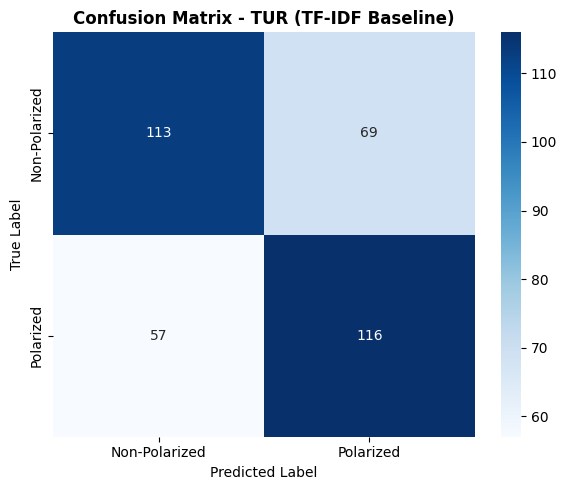

In [17]:
# ========================================
# STEP 14: TF-IDF BASELINE MODEL
# ========================================

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def train_tfidf_baseline(lang='tur'):
    """
    Train TF-IDF baseline for one language
    """
    print("="*70)
    print(f"TF-IDF BASELINE: {lang.upper()}")
    print("="*70)

    # Load data
    train_df = pd.read_csv(f'subtask1/train/{lang}.csv')

    print(f"\nOriginal samples: {len(train_df)}")
    print(f"Polarization distribution:")
    print(train_df['polarization'].value_counts())

    # Preprocess text
    print(f"\nPreprocessing...")
    train_df['text_clean'] = train_df['text'].apply(preprocess_for_tfidf)

    # Remove empty texts after preprocessing
    train_df = train_df[train_df['text_clean'].str.len() > 0]
    print(f"Samples after cleaning: {len(train_df)}")

    # Split into train and validation
    train_data, val_data = train_test_split(
        train_df,
        test_size=0.15,
        random_state=42,
        stratify=train_df['polarization']
    )

    print(f"\nSplit:")
    print(f"  Train: {len(train_data)} samples")
    print(f"  Val:   {len(val_data)} samples")

    # TF-IDF vectorization
    vectorizer = TfidfVectorizer(
        max_features=5000,
        ngram_range=(1, 2),
        min_df=2,
        max_df=0.95
    )

    X_train = vectorizer.fit_transform(train_data['text_clean'])
    X_val = vectorizer.transform(val_data['text_clean'])

    print(f"\nTF-IDF features: {X_train.shape[1]}")

    # Train model
    print(f"\nTraining Logistic Regression...")
    model = LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    )
    model.fit(X_train, train_data['polarization'])

    # Predict
    y_pred = model.predict(X_val)
    y_true = val_data['polarization']

    # Calculate metrics
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_per_class = f1_score(y_true, y_pred, average=None)

    # Print results
    print(f"\n{'='*70}")
    print(f"RESULTS")
    print(f"{'='*70}")
    print(f"F1 Macro:         {f1_macro:.4f}")
    print(f"F1 Non-Polarized: {f1_per_class[0]:.4f}")
    print(f"F1 Polarized:     {f1_per_class[1]:.4f}")

    print(f"\nDetailed Classification Report:")
    print(classification_report(
        y_true, y_pred,
        target_names=['Non-Polarized', 'Polarized'],
        digits=4
    ))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Polarized', 'Polarized'],
                yticklabels=['Non-Polarized', 'Polarized'])
    plt.title(f'Confusion Matrix - {lang.upper()} (TF-IDF Baseline)',
              fontsize=12, fontweight='bold')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    return f1_macro, model, vectorizer


# Train baseline for Turkish
print("Training TF-IDF baseline for Turkish...\n")
f1_tur, model_tur, vec_tur = train_tfidf_baseline('tur')

Starting TF-IDF baseline training for ALL 13 languages...

Found 22 languages: amh, arb, ben, deu, eng, fas, hau, hin, ita, khm, mya, nep, ori, pan, pol, rus, spa, swa, tel, tur, urd, zho

[1/22] Processing AMH...
----------------------------------------------------------------------
TF-IDF BASELINE: AMH

Original samples: 3332
Polarization distribution:
polarization
1    2518
0     814
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 3332

Split:
  Train: 2832 samples
  Val:   500 samples

TF-IDF features: 5000

Training Logistic Regression...

RESULTS
F1 Macro:         0.6466
F1 Non-Polarized: 0.4769
F1 Polarized:     0.8162

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.4493    0.5082    0.4769       122
    Polarized     0.8343    0.7989    0.8162       378

     accuracy                         0.7280       500
    macro avg     0.6418    0.6536    0.6466       500
 weighted avg     0.7403    0.7280  

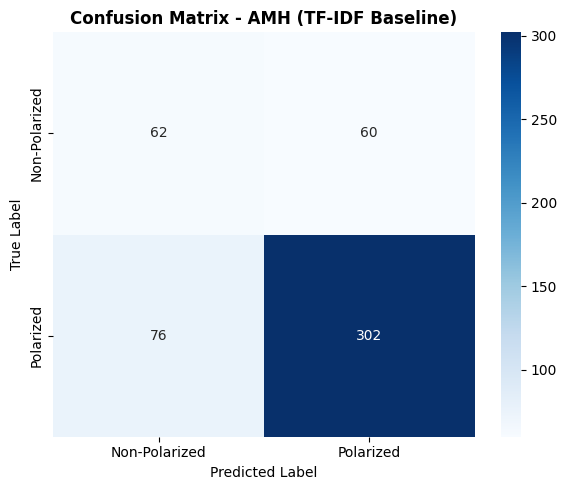

 amh: F1 = 0.6466

[2/22] Processing ARB...
----------------------------------------------------------------------
TF-IDF BASELINE: ARB

Original samples: 3380
Polarization distribution:
polarization
0    1868
1    1512
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 3380

Split:
  Train: 2873 samples
  Val:   507 samples

TF-IDF features: 5000

Training Logistic Regression...

RESULTS
F1 Macro:         0.7120
F1 Non-Polarized: 0.7160
F1 Polarized:     0.7080

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.7863    0.6571    0.7160       280
    Polarized     0.6484    0.7797    0.7080       227

     accuracy                         0.7120       507
    macro avg     0.7173    0.7184    0.7120       507
 weighted avg     0.7245    0.7120    0.7124       507



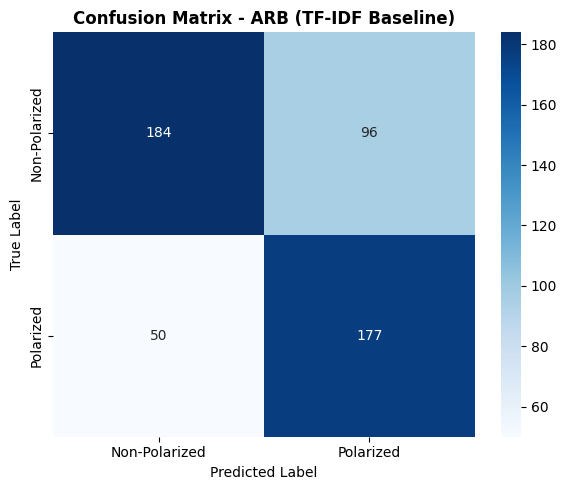

 arb: F1 = 0.7120

[3/22] Processing BEN...
----------------------------------------------------------------------
TF-IDF BASELINE: BEN

Original samples: 3333
Polarization distribution:
polarization
0    1909
1    1424
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 3333

Split:
  Train: 2833 samples
  Val:   500 samples

TF-IDF features: 5000

Training Logistic Regression...

RESULTS
F1 Macro:         0.8038
F1 Non-Polarized: 0.8387
F1 Polarized:     0.7689

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.8152    0.8636    0.8387       286
    Polarized     0.8020    0.7383    0.7689       214

     accuracy                         0.8100       500
    macro avg     0.8086    0.8010    0.8038       500
 weighted avg     0.8096    0.8100    0.8088       500



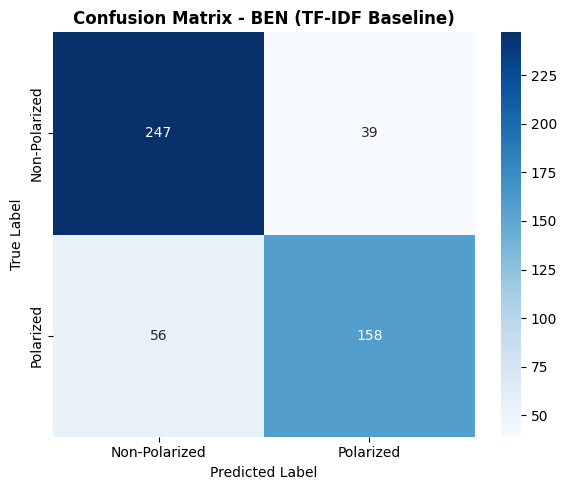

 ben: F1 = 0.8038

[4/22] Processing DEU...
----------------------------------------------------------------------
TF-IDF BASELINE: DEU

Original samples: 3180
Polarization distribution:
polarization
0    1668
1    1512
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 3180

Split:
  Train: 2703 samples
  Val:   477 samples

TF-IDF features: 5000

Training Logistic Regression...

RESULTS
F1 Macro:         0.6404
F1 Non-Polarized: 0.6600
F1 Polarized:     0.6208

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.6561    0.6640    0.6600       250
    Polarized     0.6250    0.6167    0.6208       227

     accuracy                         0.6415       477
    macro avg     0.6406    0.6404    0.6404       477
 weighted avg     0.6413    0.6415    0.6414       477



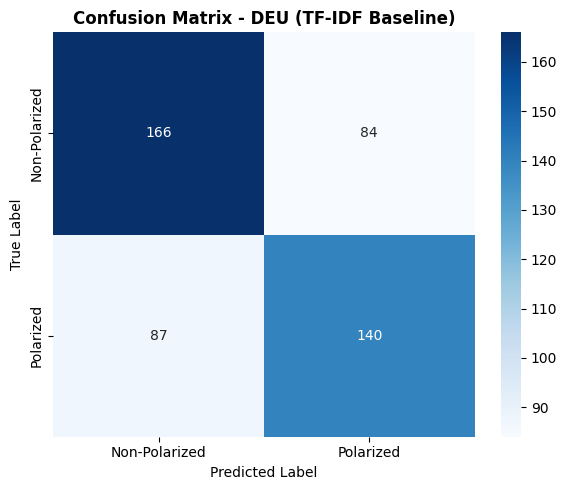

 deu: F1 = 0.6404

[5/22] Processing ENG...
----------------------------------------------------------------------
TF-IDF BASELINE: ENG

Original samples: 3222
Polarization distribution:
polarization
0    2047
1    1175
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 3222

Split:
  Train: 2738 samples
  Val:   484 samples

TF-IDF features: 5000

Training Logistic Regression...

RESULTS
F1 Macro:         0.7282
F1 Non-Polarized: 0.7933
F1 Polarized:     0.6630

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.8123    0.7752    0.7933       307
    Polarized     0.6387    0.6893    0.6630       177

     accuracy                         0.7438       484
    macro avg     0.7255    0.7323    0.7282       484
 weighted avg     0.7488    0.7438    0.7457       484



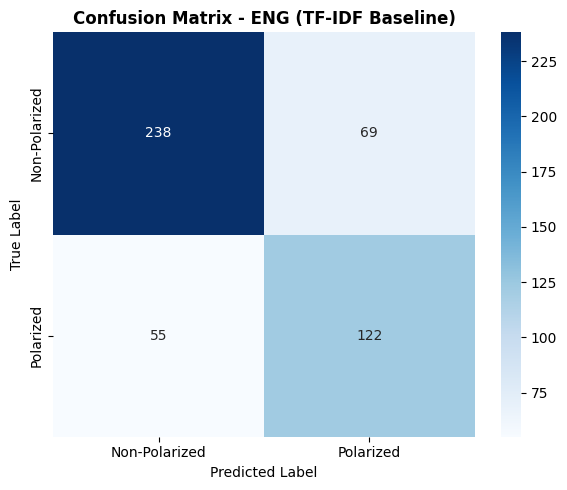

 eng: F1 = 0.7282

[6/22] Processing FAS...
----------------------------------------------------------------------
TF-IDF BASELINE: FAS

Original samples: 3295
Polarization distribution:
polarization
1    2440
0     855
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 3295

Split:
  Train: 2800 samples
  Val:   495 samples

TF-IDF features: 5000

Training Logistic Regression...

RESULTS
F1 Macro:         0.7620
F1 Non-Polarized: 0.6620
F1 Polarized:     0.8620

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.5975    0.7422    0.6620       128
    Polarized     0.9018    0.8256    0.8620       367

     accuracy                         0.8040       495
    macro avg     0.7496    0.7839    0.7620       495
 weighted avg     0.8231    0.8040    0.8103       495



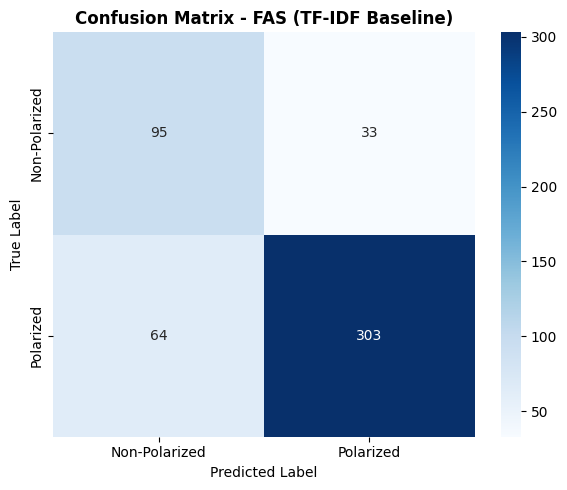

 fas: F1 = 0.7620

[7/22] Processing HAU...
----------------------------------------------------------------------
TF-IDF BASELINE: HAU

Original samples: 3651
Polarization distribution:
polarization
0    3259
1     392
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 3650

Split:
  Train: 3102 samples
  Val:   548 samples

TF-IDF features: 5000

Training Logistic Regression...

RESULTS
F1 Macro:         0.6772
F1 Non-Polarized: 0.9099
F1 Polarized:     0.4444

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.9449    0.8773    0.9099       489
    Polarized     0.3617    0.5763    0.4444        59

     accuracy                         0.8449       548
    macro avg     0.6533    0.7268    0.6772       548
 weighted avg     0.8821    0.8449    0.8598       548



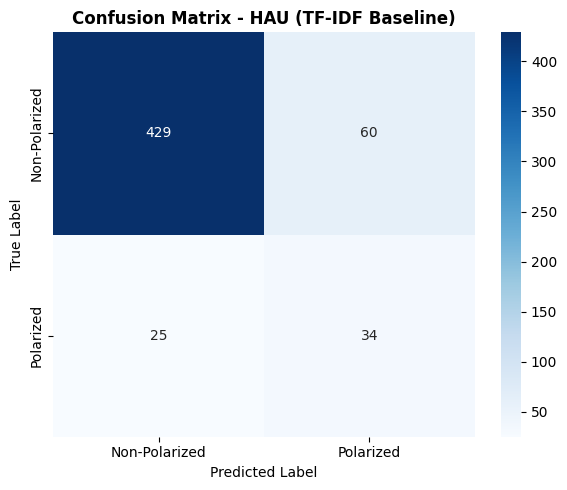

 hau: F1 = 0.6772

[8/22] Processing HIN...
----------------------------------------------------------------------
TF-IDF BASELINE: HIN

Original samples: 2744
Polarization distribution:
polarization
1    2346
0     398
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 2744

Split:
  Train: 2332 samples
  Val:   412 samples

TF-IDF features: 5000

Training Logistic Regression...

RESULTS
F1 Macro:         0.7023
F1 Non-Polarized: 0.5000
F1 Polarized:     0.9046

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.4583    0.5500    0.5000        60
    Polarized     0.9206    0.8892    0.9046       352

     accuracy                         0.8398       412
    macro avg     0.6895    0.7196    0.7023       412
 weighted avg     0.8533    0.8398    0.8457       412



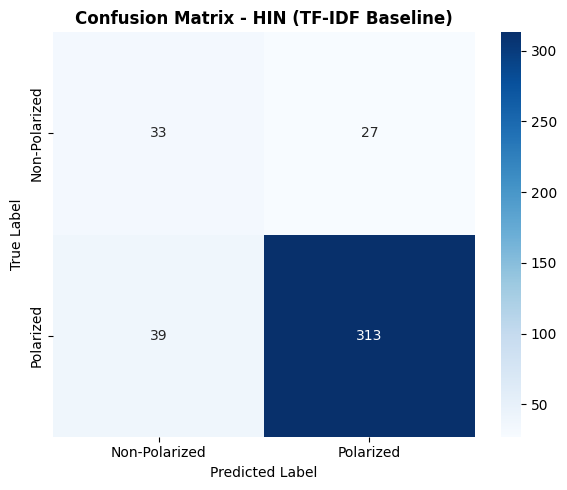

 hin: F1 = 0.7023

[9/22] Processing ITA...
----------------------------------------------------------------------
TF-IDF BASELINE: ITA

Original samples: 3334
Polarization distribution:
polarization
0    1966
1    1368
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 3334

Split:
  Train: 2833 samples
  Val:   501 samples

TF-IDF features: 5000

Training Logistic Regression...

RESULTS
F1 Macro:         0.6106
F1 Non-Polarized: 0.6735
F1 Polarized:     0.5476

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.6829    0.6644    0.6735       295
    Polarized     0.5374    0.5583    0.5476       206

     accuracy                         0.6208       501
    macro avg     0.6102    0.6113    0.6106       501
 weighted avg     0.6231    0.6208    0.6218       501



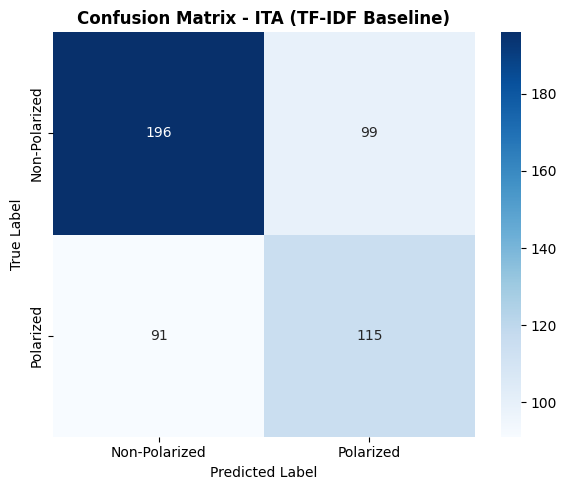

 ita: F1 = 0.6106

[10/22] Processing KHM...
----------------------------------------------------------------------
TF-IDF BASELINE: KHM

Original samples: 6640
Polarization distribution:
polarization
1    6029
0     611
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 6640

Split:
  Train: 5644 samples
  Val:   996 samples

TF-IDF features: 2304

Training Logistic Regression...

RESULTS
F1 Macro:         0.5072
F1 Non-Polarized: 0.1070
F1 Polarized:     0.9075

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.1053    0.1087    0.1070        92
    Polarized     0.9090    0.9060    0.9075       904

     accuracy                         0.8323       996
    macro avg     0.5071    0.5073    0.5072       996
 weighted avg     0.8348    0.8323    0.8335       996



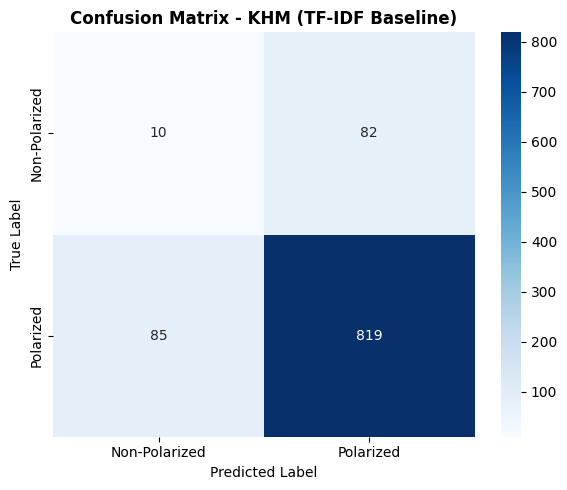

 khm: F1 = 0.5072

[11/22] Processing MYA...
----------------------------------------------------------------------
TF-IDF BASELINE: MYA

Original samples: 2889
Polarization distribution:
polarization
1    1682
0    1207
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 2888

Split:
  Train: 2454 samples
  Val:   434 samples

TF-IDF features: 3324

Training Logistic Regression...

RESULTS
F1 Macro:         0.7152
F1 Non-Polarized: 0.6667
F1 Polarized:     0.7638

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.6704    0.6630    0.6667       181
    Polarized     0.7608    0.7668    0.7638       253

     accuracy                         0.7235       434
    macro avg     0.7156    0.7149    0.7152       434
 weighted avg     0.7231    0.7235    0.7233       434



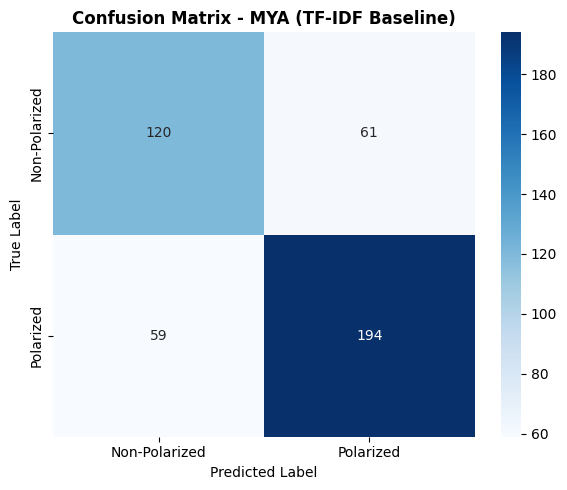

 mya: F1 = 0.7152

[12/22] Processing NEP...
----------------------------------------------------------------------
TF-IDF BASELINE: NEP

Original samples: 2005
Polarization distribution:
polarization
1    1008
0     997
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 2005

Split:
  Train: 1704 samples
  Val:   301 samples

TF-IDF features: 4221

Training Logistic Regression...

RESULTS
F1 Macro:         0.8138
F1 Non-Polarized: 0.8194
F1 Polarized:     0.8082

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.7937    0.8467    0.8194       150
    Polarized     0.8369    0.7815    0.8082       151

     accuracy                         0.8140       301
    macro avg     0.8153    0.8141    0.8138       301
 weighted avg     0.8154    0.8140    0.8138       301



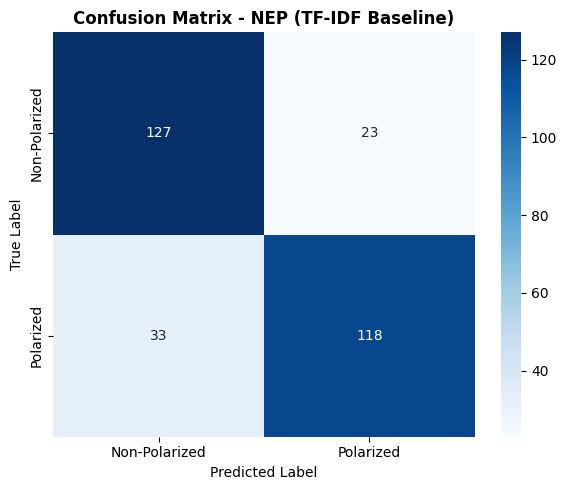

 nep: F1 = 0.8138

[13/22] Processing ORI...
----------------------------------------------------------------------
TF-IDF BASELINE: ORI

Original samples: 2368
Polarization distribution:
polarization
0    1685
1     683
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 2367

Split:
  Train: 2011 samples
  Val:   356 samples

TF-IDF features: 5000

Training Logistic Regression...

RESULTS
F1 Macro:         0.6703
F1 Non-Polarized: 0.7935
F1 Polarized:     0.5471

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.8220    0.7668    0.7935       253
    Polarized     0.5083    0.5922    0.5471       103

     accuracy                         0.7163       356
    macro avg     0.6652    0.6795    0.6703       356
 weighted avg     0.7313    0.7163    0.7222       356



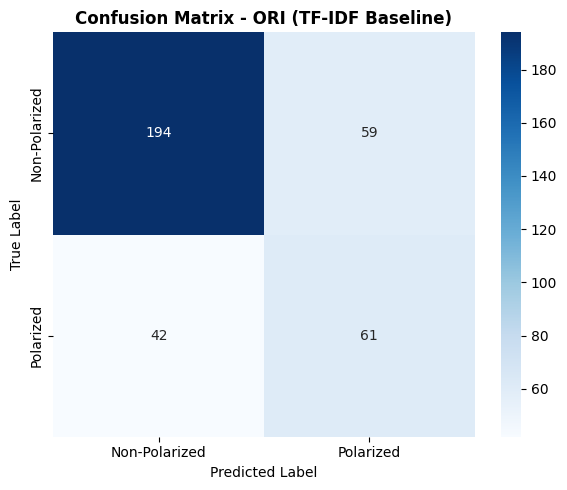

 ori: F1 = 0.6703

[14/22] Processing PAN...
----------------------------------------------------------------------
TF-IDF BASELINE: PAN

Original samples: 1700
Polarization distribution:
polarization
0    860
1    840
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 1700

Split:
  Train: 1445 samples
  Val:   255 samples

TF-IDF features: 3034

Training Logistic Regression...

RESULTS
F1 Macro:         0.7365
F1 Non-Polarized: 0.7220
F1 Polarized:     0.7509

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.7768    0.6744    0.7220       129
    Polarized     0.7063    0.8016    0.7509       126

     accuracy                         0.7373       255
    macro avg     0.7415    0.7380    0.7365       255
 weighted avg     0.7420    0.7373    0.7363       255



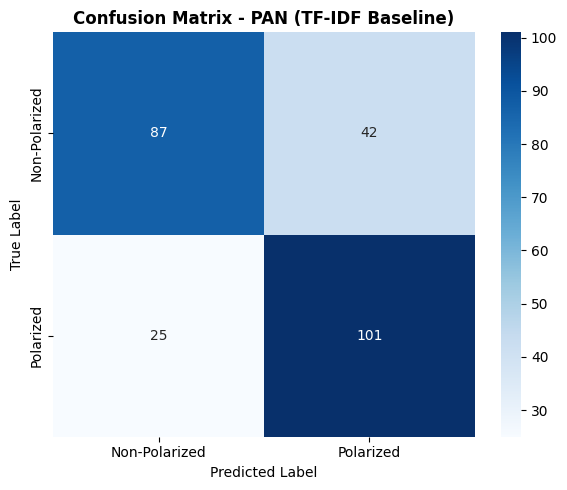

 pan: F1 = 0.7365

[15/22] Processing POL...
----------------------------------------------------------------------
TF-IDF BASELINE: POL

Original samples: 2391
Polarization distribution:
polarization
0    1388
1    1003
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 2391

Split:
  Train: 2032 samples
  Val:   359 samples

TF-IDF features: 3594

Training Logistic Regression...

RESULTS
F1 Macro:         0.6811
F1 Non-Polarized: 0.7282
F1 Polarized:     0.6340

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.7353    0.7212    0.7282       208
    Polarized     0.6258    0.6424    0.6340       151

     accuracy                         0.6880       359
    macro avg     0.6806    0.6818    0.6811       359
 weighted avg     0.6892    0.6880    0.6885       359



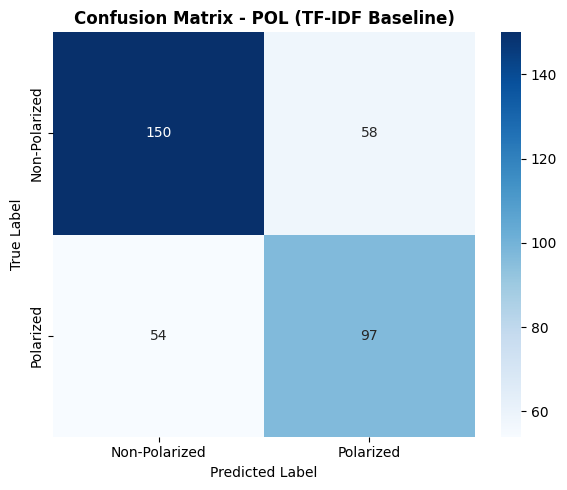

 pol: F1 = 0.6811

[16/22] Processing RUS...
----------------------------------------------------------------------
TF-IDF BASELINE: RUS

Original samples: 3348
Polarization distribution:
polarization
0    2325
1    1023
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 3348

Split:
  Train: 2845 samples
  Val:   503 samples

TF-IDF features: 5000

Training Logistic Regression...

RESULTS
F1 Macro:         0.6835
F1 Non-Polarized: 0.7905
F1 Polarized:     0.5766

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.8210    0.7622    0.7905       349
    Polarized     0.5363    0.6234    0.5766       154

     accuracy                         0.7197       503
    macro avg     0.6787    0.6928    0.6835       503
 weighted avg     0.7338    0.7197    0.7250       503



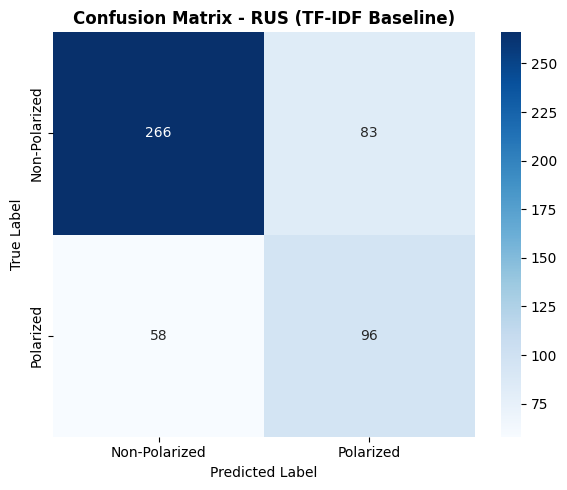

 rus: F1 = 0.6835

[17/22] Processing SPA...
----------------------------------------------------------------------
TF-IDF BASELINE: SPA

Original samples: 3305
Polarization distribution:
polarization
1    1660
0    1645
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 3305

Split:
  Train: 2809 samples
  Val:   496 samples

TF-IDF features: 4361

Training Logistic Regression...

RESULTS
F1 Macro:         0.6673
F1 Non-Polarized: 0.6653
F1 Polarized:     0.6693

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.6667    0.6640    0.6653       247
    Polarized     0.6680    0.6707    0.6693       249

     accuracy                         0.6673       496
    macro avg     0.6673    0.6673    0.6673       496
 weighted avg     0.6673    0.6673    0.6673       496



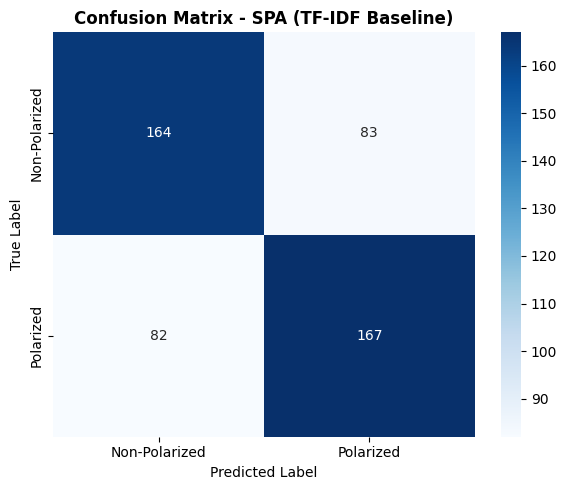

 spa: F1 = 0.6673

[18/22] Processing SWA...
----------------------------------------------------------------------
TF-IDF BASELINE: SWA

Original samples: 6991
Polarization distribution:
polarization
1    3504
0    3487
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 6991

Split:
  Train: 5942 samples
  Val:   1049 samples

TF-IDF features: 5000

Training Logistic Regression...

RESULTS
F1 Macro:         0.7957
F1 Non-Polarized: 0.8033
F1 Polarized:     0.7881

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.7735    0.8356    0.8033       523
    Polarized     0.8223    0.7567    0.7881       526

     accuracy                         0.7960      1049
    macro avg     0.7979    0.7961    0.7957      1049
 weighted avg     0.7980    0.7960    0.7957      1049



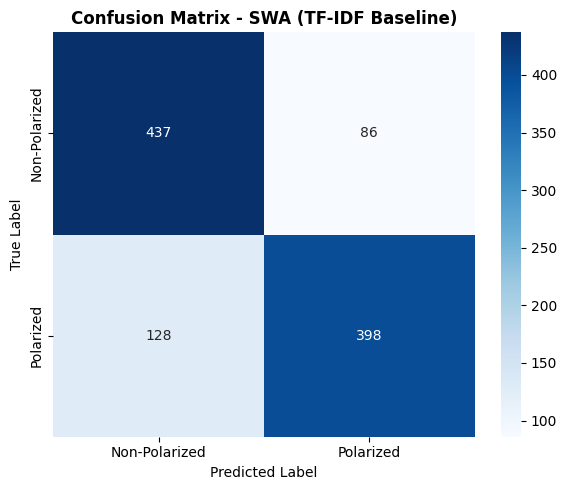

 swa: F1 = 0.7957

[19/22] Processing TEL...
----------------------------------------------------------------------
TF-IDF BASELINE: TEL

Original samples: 2366
Polarization distribution:
polarization
1    1274
0    1092
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 2366

Split:
  Train: 2011 samples
  Val:   355 samples

TF-IDF features: 4786

Training Logistic Regression...

RESULTS
F1 Macro:         0.8024
F1 Non-Polarized: 0.7929
F1 Polarized:     0.8118

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.7701    0.8171    0.7929       164
    Polarized     0.8343    0.7906    0.8118       191

     accuracy                         0.8028       355
    macro avg     0.8022    0.8038    0.8024       355
 weighted avg     0.8046    0.8028    0.8031       355



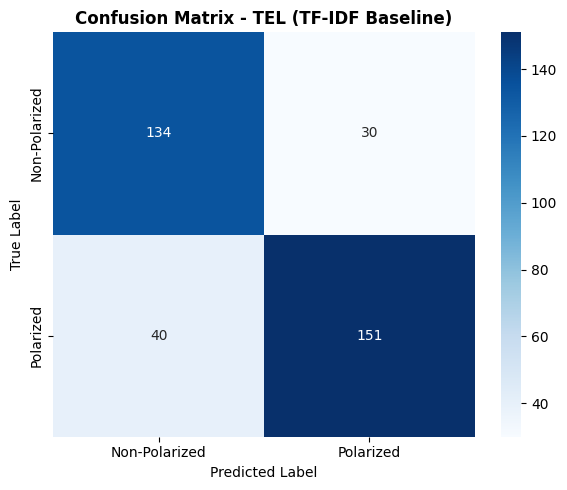

 tel: F1 = 0.8024

[20/22] Processing TUR...
----------------------------------------------------------------------
TF-IDF BASELINE: TUR

Original samples: 2364
Polarization distribution:
polarization
0    1209
1    1155
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 2364

Split:
  Train: 2009 samples
  Val:   355 samples

TF-IDF features: 5000

Training Logistic Regression...

RESULTS
F1 Macro:         0.6450
F1 Non-Polarized: 0.6420
F1 Polarized:     0.6480

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.6647    0.6209    0.6420       182
    Polarized     0.6270    0.6705    0.6480       173

     accuracy                         0.6451       355
    macro avg     0.6459    0.6457    0.6450       355
 weighted avg     0.6463    0.6451    0.6450       355



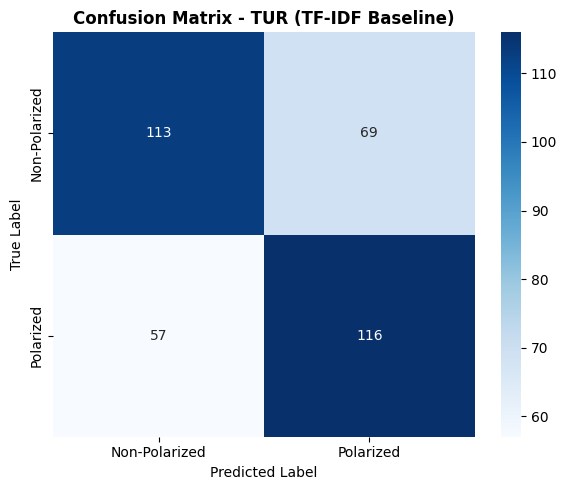

 tur: F1 = 0.6450

[21/22] Processing URD...
----------------------------------------------------------------------
TF-IDF BASELINE: URD

Original samples: 3563
Polarization distribution:
polarization
1    2476
0    1087
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 3563

Split:
  Train: 3028 samples
  Val:   535 samples

TF-IDF features: 5000

Training Logistic Regression...

RESULTS
F1 Macro:         0.7028
F1 Non-Polarized: 0.6000
F1 Polarized:     0.8056

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.5615    0.6442    0.6000       163
    Polarized     0.8333    0.7796    0.8056       372

     accuracy                         0.7383       535
    macro avg     0.6974    0.7119    0.7028       535
 weighted avg     0.7505    0.7383    0.7429       535



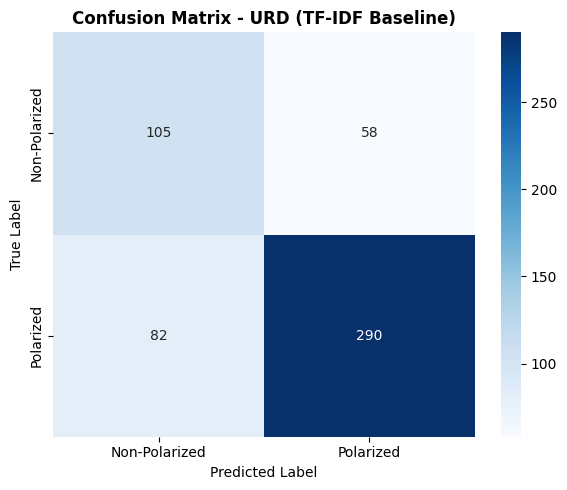

 urd: F1 = 0.7028

[22/22] Processing ZHO...
----------------------------------------------------------------------
TF-IDF BASELINE: ZHO

Original samples: 4280
Polarization distribution:
polarization
0    2159
1    2121
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 477

Split:
  Train: 405 samples
  Val:   72 samples

TF-IDF features: 34

Training Logistic Regression...

RESULTS
F1 Macro:         0.4526
F1 Non-Polarized: 0.7719
F1 Polarized:     0.1333

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.6377    0.9778    0.7719        45
    Polarized     0.6667    0.0741    0.1333        27

     accuracy                         0.6389        72
    macro avg     0.6522    0.5259    0.4526        72
 weighted avg     0.6486    0.6389    0.5325        72



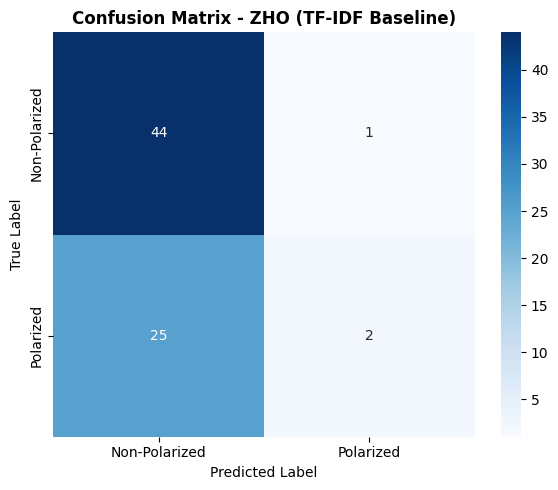

 zho: F1 = 0.4526

TF-IDF BASELINE RESULTS - ALL LANGUAGES
✓   nep: 0.8138
✓   ben: 0.8038
✓   tel: 0.8024
✓   swa: 0.7957
✓   fas: 0.7620
✓   pan: 0.7365
✓   eng: 0.7282
✓   mya: 0.7152
✓   arb: 0.7120
✓   urd: 0.7028
✓   hin: 0.7023
✓   rus: 0.6835
✓   pol: 0.6811
✓   hau: 0.6772
✓   ori: 0.6703
✓   spa: 0.6673
✓   amh: 0.6466
✓   tur: 0.6450
✓   deu: 0.6404
✓   ita: 0.6106
✓   khm: 0.5072
✓   zho: 0.4526

STATISTICS
Successful:     22/22
Average F1:     0.6889
Best:           nep (0.8138)
Worst:          zho (0.4526)
Std Dev:        0.0889


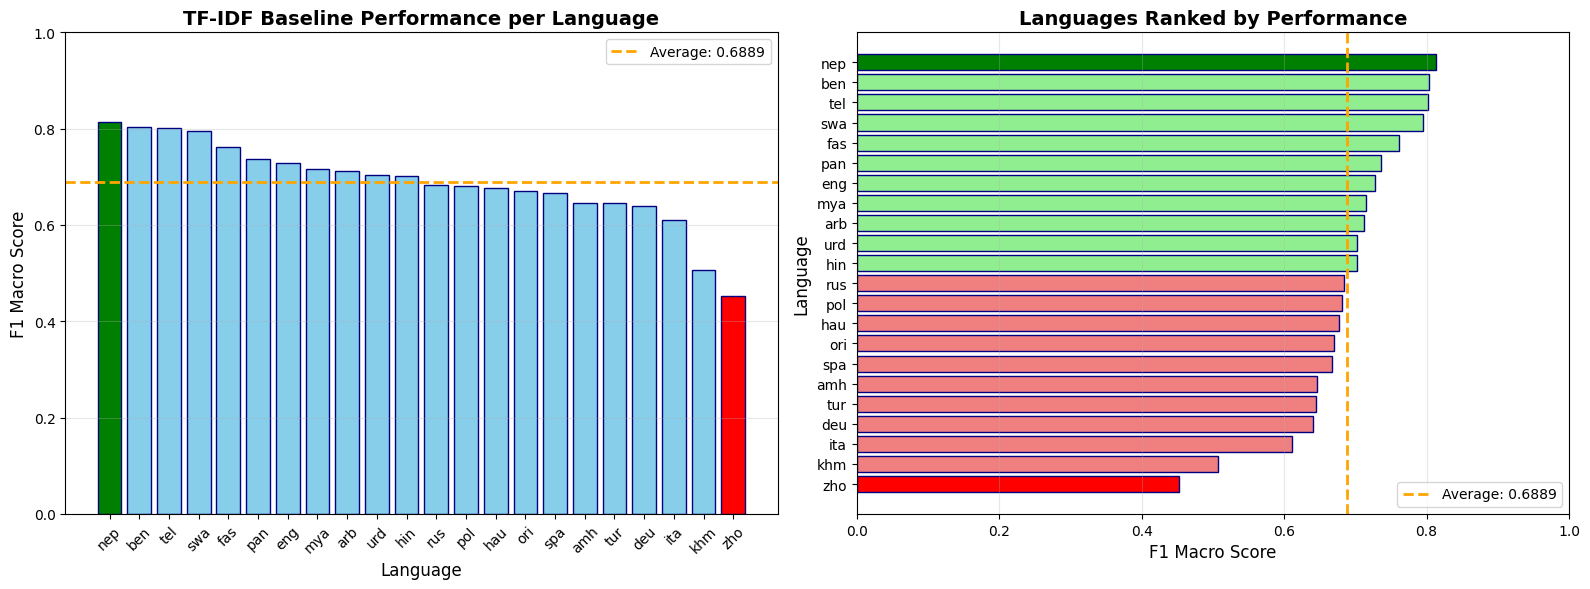

In [16]:
# ========================================
# STEP 15: BASELINE FOR ALL LANGUAGES
# ========================================

import os

def train_all_languages_baseline():
    """
    Train TF-IDF baseline for ALL languages in the dataset
    """
    # Get all language files
    train_path = 'subtask1/train/'
    all_languages = sorted([f.replace('.csv', '') for f in os.listdir(train_path) if f.endswith('.csv')])

    print(f"Found {len(all_languages)} languages: {', '.join(all_languages)}")
    print("="*70)

    results = []

    for i, lang in enumerate(all_languages, 1):
        print(f"\n[{i}/{len(all_languages)}] Processing {lang.upper()}...")
        print("-"*70)

        try:
            f1, model, vectorizer = train_tfidf_baseline(lang)

            results.append({
                'Language': lang,
                'F1_Macro': f1,
                'Status': 'Success'
            })

            print(f" {lang}: F1 = {f1:.4f}")

        except Exception as e:
            print(f"✗ {lang}: Error - {e}")
            results.append({
                'Language': lang,
                'F1_Macro': 0.0,
                'Status': 'Failed'
            })

    # Create results DataFrame
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('F1_Macro', ascending=False)

    # Print summary
    print("\n" + "="*70)
    print("TF-IDF BASELINE RESULTS - ALL LANGUAGES")
    print("="*70)

    for idx, row in results_df.iterrows():
        status_symbol = "✓" if row['Status'] == 'Success' else "✗"
        print(f"{status_symbol} {row['Language']:>5}: {row['F1_Macro']:.4f}")

    # Statistics
    successful = results_df[results_df['Status'] == 'Success']

    print("\n" + "="*70)
    print("STATISTICS")
    print("="*70)
    print(f"Successful:     {len(successful)}/{len(results_df)}")
    print(f"Average F1:     {successful['F1_Macro'].mean():.4f}")
    print(f"Best:           {successful.iloc[0]['Language']} ({successful.iloc[0]['F1_Macro']:.4f})")
    print(f"Worst:          {successful.iloc[-1]['Language']} ({successful.iloc[-1]['F1_Macro']:.4f})")
    print(f"Std Dev:        {successful['F1_Macro'].std():.4f}")

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot 1: Bar chart
    ax1 = axes[0]
    colors = ['green' if x == successful['F1_Macro'].max() else
              'red' if x == successful['F1_Macro'].min() else
              'skyblue' for x in successful['F1_Macro']]

    ax1.bar(range(len(successful)), successful['F1_Macro'], color=colors, edgecolor='navy')
    ax1.axhline(y=successful['F1_Macro'].mean(), color='orange',
                linestyle='--', linewidth=2, label=f"Average: {successful['F1_Macro'].mean():.4f}")
    ax1.set_xticks(range(len(successful)))
    ax1.set_xticklabels(successful['Language'], rotation=45)
    ax1.set_xlabel('Language', fontsize=12)
    ax1.set_ylabel('F1 Macro Score', fontsize=12)
    ax1.set_title('TF-IDF Baseline Performance per Language', fontsize=14, fontweight='bold')
    ax1.set_ylim([0, 1])
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)

    # Plot 2: Sorted bar chart
    ax2 = axes[1]
    sorted_results = successful.sort_values('F1_Macro', ascending=True)
    colors_sorted = ['green' if x == sorted_results['F1_Macro'].max() else
                     'red' if x == sorted_results['F1_Macro'].min() else
                     'lightcoral' if x < sorted_results['F1_Macro'].mean() else
                     'lightgreen' for x in sorted_results['F1_Macro']]

    ax2.barh(range(len(sorted_results)), sorted_results['F1_Macro'],
             color=colors_sorted, edgecolor='navy')
    ax2.axvline(x=sorted_results['F1_Macro'].mean(), color='orange',
                linestyle='--', linewidth=2, label=f"Average: {sorted_results['F1_Macro'].mean():.4f}")
    ax2.set_yticks(range(len(sorted_results)))
    ax2.set_yticklabels(sorted_results['Language'])
    ax2.set_xlabel('F1 Macro Score', fontsize=12)
    ax2.set_ylabel('Language', fontsize=12)
    ax2.set_title('Languages Ranked by Performance', fontsize=14, fontweight='bold')
    ax2.set_xlim([0, 1])
    ax2.legend()
    ax2.grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.show()

    return results_df

# Run baseline for ALL languages
print("Starting TF-IDF baseline training for ALL 13 languages...\n")
all_baseline_results = train_all_languages_baseline()

In [18]:
# ========================================
# STEP 16: INSTALL AND SETUP TRANSFORMERS
# ========================================

# Install required packages
!pip install -q transformers datasets accelerate evaluate

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from datasets import Dataset

# Check GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Device: {device}")

if device == 'cuda':
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
else:
    print("Warning: No GPU available. Training will be slow.")

print("\nAll packages installed!")

Device: cuda
GPU: NVIDIA A100-SXM4-40GB
Memory: 42.47 GB

All packages installed!


In [19]:
# ========================================
# STEP 17: LOAD XLM-ROBERTA
# ========================================

model_name = "xlm-roberta-base"

print(f"Loading {model_name}...")

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load model
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2,
    problem_type="single_label_classification"
)

# Move to device
model = model.to(device)

# Model info
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\nModel loaded!")
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

Loading xlm-roberta-base...


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Model loaded!
Total parameters: 278,045,186
Trainable parameters: 278,045,186


In [21]:
# ========================================
# STEP 18: PREPARE DATA FOR XLM-ROBERTA
# ========================================

# All necessary imports
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from datasets import Dataset

# Preprocessing function (in case it's not in memory)
def preprocess_for_transformer(text):
    text = str(text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def prepare_xlmr_dataset(lang='tur', test_size=0.15, max_length=128):
    print(f"Preparing {lang.upper()} dataset...")

    train_df = pd.read_csv(f'subtask1/train/{lang}.csv')
    train_df['text_clean'] = train_df['text'].apply(preprocess_for_transformer)

    train_data, val_data = train_test_split(
        train_df, test_size=test_size, random_state=42,
        stratify=train_df['polarization']
    )

    print(f"  Train: {len(train_data)}, Val: {len(val_data)}")

    train_dataset = Dataset.from_pandas(train_data[['text_clean', 'polarization']])
    val_dataset = Dataset.from_pandas(val_data[['text_clean', 'polarization']])

    def tokenize_function(examples):
        return tokenizer(examples['text_clean'], padding='max_length',
                        truncation=True, max_length=max_length)

    train_dataset = train_dataset.map(tokenize_function, batched=True)
    val_dataset = val_dataset.map(tokenize_function, batched=True)

    train_dataset = train_dataset.rename_column('polarization', 'labels')
    val_dataset = val_dataset.rename_column('polarization', 'labels')

    train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
    val_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

    print("Ready!")
    return train_dataset, val_dataset

# Run it
train_dataset, val_dataset = prepare_xlmr_dataset('tur')
print(f"\nTrain: {len(train_dataset)}, Val: {len(val_dataset)}")

Preparing TUR dataset...
  Train: 2009, Val: 355


Map:   0%|          | 0/2009 [00:00<?, ? examples/s]

Map:   0%|          | 0/355 [00:00<?, ? examples/s]

Ready!

Train: 2009, Val: 355


In [22]:
# ========================================
# STEP 19: TRAIN XLM-ROBERTA
# ========================================

from transformers import TrainingArguments, Trainer
import numpy as np
from sklearn.metrics import f1_score, accuracy_score

# Define compute metrics function
def compute_metrics(eval_pred):
    """
    Compute F1 score and accuracy
    """
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    f1_macro = f1_score(labels, predictions, average='macro')
    f1_per_class = f1_score(labels, predictions, average=None)
    accuracy = accuracy_score(labels, predictions)

    return {
        'f1_macro': f1_macro,
        'f1_non_polarized': f1_per_class[0],
        'f1_polarized': f1_per_class[1],
        'accuracy': accuracy
    }

# Training arguments
training_args = TrainingArguments(
    output_dir='./results_xlmr_tur',
    eval_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model='f1_macro',
    save_total_limit=2,
    fp16=torch.cuda.is_available(),  # Use mixed precision if GPU available
    report_to='none'  # Disable wandb
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# Train
print("="*70)
print("TRAINING XLM-ROBERTA ON TURKISH")
print("="*70)
print(f"Train samples: {len(train_dataset)}")
print(f"Val samples: {len(val_dataset)}")
print(f"Epochs: {training_args.num_train_epochs}")
print(f"Batch size: {training_args.per_device_train_batch_size}")
print(f"Learning rate: {training_args.learning_rate}")
print("="*70)

# Start training
trainer.train()

# Evaluate
print("\n" + "="*70)
print("FINAL EVALUATION")
print("="*70)

eval_results = trainer.evaluate()

print(f"F1 Macro:         {eval_results['eval_f1_macro']:.4f}")
print(f"F1 Non-Polarized: {eval_results['eval_f1_non_polarized']:.4f}")
print(f"F1 Polarized:     {eval_results['eval_f1_polarized']:.4f}")
print(f"Accuracy:         {eval_results['eval_accuracy']:.4f}")

# Compare with TF-IDF baseline
print("\n" + "="*70)
print("COMPARISON")
print("="*70)
print(f"TF-IDF Baseline:  0.6423")
print(f"XLM-RoBERTa:      {eval_results['eval_f1_macro']:.4f}")
print(f"Improvement:      {eval_results['eval_f1_macro'] - 0.6423:+.4f}")

TRAINING XLM-ROBERTA ON TURKISH
Train samples: 2009
Val samples: 355
Epochs: 3
Batch size: 16
Learning rate: 2e-05


Epoch,Training Loss,Validation Loss,F1 Macro,F1 Non Polarized,F1 Polarized,Accuracy
1,0.648400,0.574860,0.712656,0.715084,0.710227,0.712676
2,0.531500,0.636792,0.717541,0.685714,0.749367,0.721127
3,0.430500,0.608057,0.749288,0.747875,0.750700,0.749296



FINAL EVALUATION


F1 Macro:         0.7493
F1 Non-Polarized: 0.7479
F1 Polarized:     0.7507
Accuracy:         0.7493

COMPARISON
TF-IDF Baseline:  0.6423
XLM-RoBERTa:      0.7493
Improvement:      +0.1070


In [23]:
# ========================================
# STEP 20: PREPARE MULTILINGUAL DATASET
# ========================================

import pandas as pd
import os
from datasets import Dataset
from sklearn.model_selection import train_test_split

def prepare_multilingual_dataset(test_size=0.15, max_length=128):
    """
    Combine all languages into one dataset
    """
    print("="*70)
    print("PREPARING MULTILINGUAL DATASET")
    print("="*70)

    # Get all language files
    train_path = 'subtask1/train/'
    all_languages = sorted([f.replace('.csv', '') for f in os.listdir(train_path) if f.endswith('.csv')])

    print(f"\nFound {len(all_languages)} languages: {', '.join(all_languages)}")

    all_train_data = []
    all_val_data = []

    stats = []

    for lang in all_languages:
        print(f"\nProcessing {lang}...")

        # Load data
        df = pd.read_csv(f'subtask1/train/{lang}.csv')

        # Preprocess
        df['text_clean'] = df['text'].apply(preprocess_for_transformer)

        # Add language identifier
        df['language'] = lang

        # Split
        lang_train_data, lang_val_data = train_test_split(
            df, test_size=test_size, random_state=42,
            stratify=df['polarization']
        )

        print(f"  {lang}: Train={len(lang_train_data)}, Val={len(lang_val_data)}")

        all_train_data.append(lang_train_data)
        all_val_data.append(lang_val_data)

        stats.append({
            'Language': lang,
            'Train': len(lang_train_data),
            'Val': len(lang_val_data)
        })

    # Concatenate all language dataframes
    combined_train_df = pd.concat(all_train_data, ignore_index=True)
    combined_val_df = pd.concat(all_val_data, ignore_index=True)

    # Shuffle
    combined_train_df = combined_train_df.sample(frac=1, random_state=42).reset_index(drop=True)
    combined_val_df = combined_val_df.sample(frac=1, random_state=42).reset_index(drop=True)

    print("\n" + "="*70)
    print("COMBINED DATASET STATISTICS")
    print("="*70)
    print(f"Total train samples: {len(combined_train_df):,}")
    print(f"Total val samples: {len(combined_val_df):,}")

    # Show stats
    stats_df = pd.DataFrame(stats)
    print("\nSamples per language:")
    print(stats_df.to_string(index=False))

    # Convert to Hugging Face Dataset objects
    train_dataset = Dataset.from_pandas(combined_train_df[['text_clean', 'polarization', 'language']])
    val_dataset = Dataset.from_pandas(combined_val_df[['text_clean', 'polarization', 'language']])

    # Tokenization function
    def tokenize_function(examples):
        return tokenizer(examples['text_clean'], padding='max_length',
                        truncation=True, max_length=max_length)

    print("\nTokenizing...")
    train_dataset = train_dataset.map(tokenize_function, batched=True, remove_columns=['text_clean'])
    val_dataset = val_dataset.map(tokenize_function, batched=True, remove_columns=['text_clean'])

    # Rename 'polarization' column to 'labels'
    train_dataset = train_dataset.rename_column('polarization', 'labels')
    val_dataset = val_dataset.rename_column('polarization', 'labels')

    # Set format to PyTorch tensors
    train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
    val_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

    print("\nMultilingual dataset ready!")

    # Return 4 things: train_dataset, val_dataset, train_df, val_df
    return train_dataset, val_dataset, combined_train_df, combined_val_df

# Run it and save ALL 4 outputs
multilingual_train, multilingual_val, train_df, val_df = prepare_multilingual_dataset()

print(f"\nSaved variables:")
print(f"  multilingual_train: {len(multilingual_train):,} samples")
print(f"  multilingual_val: {len(multilingual_val):,} samples")
print(f"  train_df: {len(train_df):,} rows")
print(f"  val_df: {len(val_df):,} rows")

PREPARING MULTILINGUAL DATASET

Found 22 languages: amh, arb, ben, deu, eng, fas, hau, hin, ita, khm, mya, nep, ori, pan, pol, rus, spa, swa, tel, tur, urd, zho

Processing amh...
  amh: Train=2832, Val=500

Processing arb...
  arb: Train=2873, Val=507

Processing ben...
  ben: Train=2833, Val=500

Processing deu...
  deu: Train=2703, Val=477

Processing eng...
  eng: Train=2738, Val=484

Processing fas...
  fas: Train=2800, Val=495

Processing hau...
  hau: Train=3103, Val=548

Processing hin...
  hin: Train=2332, Val=412

Processing ita...
  ita: Train=2833, Val=501

Processing khm...
  khm: Train=5644, Val=996

Processing mya...
  mya: Train=2455, Val=434

Processing nep...
  nep: Train=1704, Val=301

Processing ori...
  ori: Train=2012, Val=356

Processing pan...
  pan: Train=1445, Val=255

Processing pol...
  pol: Train=2032, Val=359

Processing rus...
  rus: Train=2845, Val=503

Processing spa...
  spa: Train=2809, Val=496

Processing swa...
  swa: Train=5942, Val=1049

Processin

Map:   0%|          | 0/62621 [00:00<?, ? examples/s]

Map:   0%|          | 0/11060 [00:00<?, ? examples/s]


Multilingual dataset ready!

Saved variables:
  multilingual_train: 62,621 samples
  multilingual_val: 11,060 samples
  train_df: 62,621 rows
  val_df: 11,060 rows


In [24]:
import os
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer, EarlyStoppingCallback
import torch
from datasets import concatenate_datasets # Import concatenate_datasets

# Load fresh model
model_name = "xlm-roberta-base"
multilingual_model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2
).to(device)

print("\nPreparing multilingual datasets...")

all_train_datasets = []
all_val_datasets = []

train_path = 'subtask1/train/'
all_languages = sorted([f.replace('.csv', '') for f in os.listdir(train_path) if f.endswith('.csv')])

for lang in all_languages:
    train_ds, val_ds = prepare_xlmr_dataset(lang, test_size=0.15, max_length=128)
    all_train_datasets.append(train_ds)
    all_val_datasets.append(val_ds)

multilingual_train = concatenate_datasets(all_train_datasets)
multilingual_val = concatenate_datasets(all_val_datasets)

print(f"Combined multilingual train dataset size: {len(multilingual_train)}")
print(f"Combined multilingual validation dataset size: {len(multilingual_val)}")


# Training arguments with 10 epochs
training_args = TrainingArguments(
    output_dir='./results_xlmr_multilingual',

    # Evaluation
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='f1_macro',
    save_total_limit=1,  # Keep only best checkpoint

    # Training
    num_train_epochs=10,  # Allow up to 10 epochs
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    warmup_steps=500,  # Warmup for better stability with more epochs

    # Logging
    logging_steps=100,

    # Performance
    fp16=torch.cuda.is_available(),

    # Misc
    report_to='none'
)

# Trainer with early stopping
trainer = Trainer(
    model=multilingual_model,
    args=training_args,
    train_dataset=multilingual_train,
    eval_dataset=multilingual_val,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]  # Stop if no improvement for 3 epochs
)

print("="*70)
print("TRAINING MULTILINGUAL XLM-ROBERTA")
print("="*70)
print(f"Train samples: {len(multilingual_train):,} (all 13 languages)")
print(f"Val samples: {len(multilingual_val):,}")
print(f"Max epochs: {training_args.num_train_epochs}")
print(f"Early stopping patience: 3 epochs")
print(f"Learning rate: {training_args.learning_rate}")
print(f"Warmup steps: {training_args.warmup_steps}")
print(f"Will automatically save and load best model")
print("="*70)

# Train
print("\nStarting training...")
train_result = trainer.train()

# Show which epoch was best
print("\n" + "="*70)
print("TRAINING COMPLETED")
print("="*70)
print(f"Total epochs run: {int(train_result.metrics['epoch'])}")
print(f"Best model automatically loaded")

# Evaluate overall
eval_results_final = trainer.evaluate() # Renamed to avoid confusion with previous eval_results

print("\n" + "="*70)
print("MULTILINGUAL MODEL - OVERALL RESULTS")
print("="*70)
print(f"F1 Macro:         {eval_results_final['eval_f1_macro']:.4f}")
print(f"F1 Non-Polarized: {eval_results_final['eval_f1_non_polarized']:.4f}")
print(f"F1 Polarized:     {eval_results_final['eval_f1_polarized']:.4f}")
print(f"Accuracy:         {eval_results_final['eval_accuracy']:.4f}")


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Preparing multilingual datasets...
Preparing AMH dataset...
  Train: 2832, Val: 500


Map:   0%|          | 0/2832 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Ready!
Preparing ARB dataset...
  Train: 2873, Val: 507


Map:   0%|          | 0/2873 [00:00<?, ? examples/s]

Map:   0%|          | 0/507 [00:00<?, ? examples/s]

Ready!
Preparing BEN dataset...
  Train: 2833, Val: 500


Map:   0%|          | 0/2833 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Ready!
Preparing DEU dataset...
  Train: 2703, Val: 477


Map:   0%|          | 0/2703 [00:00<?, ? examples/s]

Map:   0%|          | 0/477 [00:00<?, ? examples/s]

Ready!
Preparing ENG dataset...
  Train: 2738, Val: 484


Map:   0%|          | 0/2738 [00:00<?, ? examples/s]

Map:   0%|          | 0/484 [00:00<?, ? examples/s]

Ready!
Preparing FAS dataset...
  Train: 2800, Val: 495


Map:   0%|          | 0/2800 [00:00<?, ? examples/s]

Map:   0%|          | 0/495 [00:00<?, ? examples/s]

Ready!
Preparing HAU dataset...
  Train: 3103, Val: 548


Map:   0%|          | 0/3103 [00:00<?, ? examples/s]

Map:   0%|          | 0/548 [00:00<?, ? examples/s]

Ready!
Preparing HIN dataset...
  Train: 2332, Val: 412


Map:   0%|          | 0/2332 [00:00<?, ? examples/s]

Map:   0%|          | 0/412 [00:00<?, ? examples/s]

Ready!
Preparing ITA dataset...
  Train: 2833, Val: 501


Map:   0%|          | 0/2833 [00:00<?, ? examples/s]

Map:   0%|          | 0/501 [00:00<?, ? examples/s]

Ready!
Preparing KHM dataset...
  Train: 5644, Val: 996


Map:   0%|          | 0/5644 [00:00<?, ? examples/s]

Map:   0%|          | 0/996 [00:00<?, ? examples/s]

Ready!
Preparing MYA dataset...
  Train: 2455, Val: 434


Map:   0%|          | 0/2455 [00:00<?, ? examples/s]

Map:   0%|          | 0/434 [00:00<?, ? examples/s]

Ready!
Preparing NEP dataset...
  Train: 1704, Val: 301


Map:   0%|          | 0/1704 [00:00<?, ? examples/s]

Map:   0%|          | 0/301 [00:00<?, ? examples/s]

Ready!
Preparing ORI dataset...
  Train: 2012, Val: 356


Map:   0%|          | 0/2012 [00:00<?, ? examples/s]

Map:   0%|          | 0/356 [00:00<?, ? examples/s]

Ready!
Preparing PAN dataset...
  Train: 1445, Val: 255


Map:   0%|          | 0/1445 [00:00<?, ? examples/s]

Map:   0%|          | 0/255 [00:00<?, ? examples/s]

Ready!
Preparing POL dataset...
  Train: 2032, Val: 359


Map:   0%|          | 0/2032 [00:00<?, ? examples/s]

Map:   0%|          | 0/359 [00:00<?, ? examples/s]

Ready!
Preparing RUS dataset...
  Train: 2845, Val: 503


Map:   0%|          | 0/2845 [00:00<?, ? examples/s]

Map:   0%|          | 0/503 [00:00<?, ? examples/s]

Ready!
Preparing SPA dataset...
  Train: 2809, Val: 496


Map:   0%|          | 0/2809 [00:00<?, ? examples/s]

Map:   0%|          | 0/496 [00:00<?, ? examples/s]

Ready!
Preparing SWA dataset...
  Train: 5942, Val: 1049


Map:   0%|          | 0/5942 [00:00<?, ? examples/s]

Map:   0%|          | 0/1049 [00:00<?, ? examples/s]

Ready!
Preparing TEL dataset...
  Train: 2011, Val: 355


Map:   0%|          | 0/2011 [00:00<?, ? examples/s]

Map:   0%|          | 0/355 [00:00<?, ? examples/s]

Ready!
Preparing TUR dataset...
  Train: 2009, Val: 355


Map:   0%|          | 0/2009 [00:00<?, ? examples/s]

Map:   0%|          | 0/355 [00:00<?, ? examples/s]

Ready!
Preparing URD dataset...
  Train: 3028, Val: 535


Map:   0%|          | 0/3028 [00:00<?, ? examples/s]

Map:   0%|          | 0/535 [00:00<?, ? examples/s]

Ready!
Preparing ZHO dataset...
  Train: 3638, Val: 642


Map:   0%|          | 0/3638 [00:00<?, ? examples/s]

Map:   0%|          | 0/642 [00:00<?, ? examples/s]

Ready!
Combined multilingual train dataset size: 62621
Combined multilingual validation dataset size: 11060
TRAINING MULTILINGUAL XLM-ROBERTA
Train samples: 62,621 (all 13 languages)
Val samples: 11,060
Max epochs: 10
Early stopping patience: 3 epochs
Learning rate: 2e-05
Warmup steps: 500
Will automatically save and load best model

Starting training...


Epoch,Training Loss,Validation Loss,F1 Macro,F1 Non Polarized,F1 Polarized,Accuracy
1,0.457000,0.449719,0.788581,0.762239,0.814922,0.791863
2,0.412900,0.454449,0.806753,0.790940,0.822566,0.808047
3,0.323900,0.468028,0.804411,0.799778,0.809044,0.804521
4,0.246800,0.613762,0.803468,0.791811,0.815125,0.804159
5,0.219700,0.650897,0.798692,0.785569,0.811816,0.799548



TRAINING COMPLETED
Total epochs run: 5
Best model automatically loaded



MULTILINGUAL MODEL - OVERALL RESULTS
F1 Macro:         0.8068
F1 Non-Polarized: 0.7909
F1 Polarized:     0.8226
Accuracy:         0.8080


In [25]:
# ========================================
# STEP 22: EVALUATE MULTILINGUAL MODEL PER LANGUAGE
# ========================================

def evaluate_per_language(model, val_df, trainer):
    """
    Evaluate multilingual model on each language separately
    """
    print("\n" + "="*70)
    print("PER-LANGUAGE EVALUATION")
    print("="*70)

    results = []

    all_languages = sorted(val_df['language'].unique())

    for lang in all_languages:
        print(f"\nEvaluating {lang.upper()}...")

        # Get validation data for this language
        lang_val_df = val_df[val_df['language'] == lang].reset_index(drop=True)

        # Convert to dataset
        lang_val_dataset = Dataset.from_pandas(lang_val_df[['text_clean', 'polarization']])

        # Tokenize
        def tokenize_function(examples):
            return tokenizer(examples['text_clean'], padding='max_length',
                           truncation=True, max_length=128)

        lang_val_dataset = lang_val_dataset.map(tokenize_function, batched=True)
        lang_val_dataset = lang_val_dataset.rename_column('polarization', 'labels')
        lang_val_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

        # Evaluate
        eval_result = trainer.evaluate(lang_val_dataset)

        results.append({
            'Language': lang,
            'F1_Macro': eval_result['eval_f1_macro'],
            'Accuracy': eval_result['eval_accuracy'],
            'Samples': len(lang_val_df)
        })

        print(f"  F1 Macro: {eval_result['eval_f1_macro']:.4f}")

    # Create results DataFrame
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('F1_Macro', ascending=False)

    print("\n" + "="*70)
    print("MULTILINGUAL MODEL - PER LANGUAGE RESULTS")
    print("="*70)
    print(results_df.to_string(index=False))

    # Statistics
    print("\n" + "="*70)
    print("STATISTICS")
    print("="*70)
    print(f"Average F1 Macro: {results_df['F1_Macro'].mean():.4f}")
    print(f"Best: {results_df.iloc[0]['Language']} ({results_df.iloc[0]['F1_Macro']:.4f})")
    print(f"Worst: {results_df.iloc[-1]['Language']} ({results_df.iloc[-1]['F1_Macro']:.4f})")

    return results_df

# Evaluate
multilingual_results = evaluate_per_language(multilingual_model, val_df, trainer)


PER-LANGUAGE EVALUATION

Evaluating AMH...


Map:   0%|          | 0/500 [00:00<?, ? examples/s]

  F1 Macro: 0.6918

Evaluating ARB...


Map:   0%|          | 0/507 [00:00<?, ? examples/s]

  F1 Macro: 0.7751

Evaluating BEN...


Map:   0%|          | 0/500 [00:00<?, ? examples/s]

  F1 Macro: 0.8126

Evaluating DEU...


Map:   0%|          | 0/477 [00:00<?, ? examples/s]

  F1 Macro: 0.6882

Evaluating ENG...


Map:   0%|          | 0/484 [00:00<?, ? examples/s]

  F1 Macro: 0.7659

Evaluating FAS...


Map:   0%|          | 0/495 [00:00<?, ? examples/s]

  F1 Macro: 0.8020

Evaluating HAU...


Map:   0%|          | 0/548 [00:00<?, ? examples/s]

  F1 Macro: 0.7946

Evaluating HIN...


Map:   0%|          | 0/412 [00:00<?, ? examples/s]

  F1 Macro: 0.7692

Evaluating ITA...


Map:   0%|          | 0/501 [00:00<?, ? examples/s]

  F1 Macro: 0.6214

Evaluating KHM...


Map:   0%|          | 0/996 [00:00<?, ? examples/s]

  F1 Macro: 0.5972

Evaluating MYA...


Map:   0%|          | 0/434 [00:00<?, ? examples/s]

  F1 Macro: 0.8474

Evaluating NEP...


Map:   0%|          | 0/301 [00:00<?, ? examples/s]

  F1 Macro: 0.8637

Evaluating ORI...


Map:   0%|          | 0/356 [00:00<?, ? examples/s]

  F1 Macro: 0.7227

Evaluating PAN...


Map:   0%|          | 0/255 [00:00<?, ? examples/s]

  F1 Macro: 0.6932

Evaluating POL...


Map:   0%|          | 0/359 [00:00<?, ? examples/s]

  F1 Macro: 0.8206

Evaluating RUS...


Map:   0%|          | 0/503 [00:00<?, ? examples/s]

  F1 Macro: 0.7469

Evaluating SPA...


Map:   0%|          | 0/496 [00:00<?, ? examples/s]

  F1 Macro: 0.7182

Evaluating SWA...


Map:   0%|          | 0/1049 [00:00<?, ? examples/s]

  F1 Macro: 0.7623

Evaluating TEL...


Map:   0%|          | 0/355 [00:00<?, ? examples/s]

  F1 Macro: 0.8616

Evaluating TUR...


Map:   0%|          | 0/355 [00:00<?, ? examples/s]

  F1 Macro: 0.7803

Evaluating URD...


Map:   0%|          | 0/535 [00:00<?, ? examples/s]

  F1 Macro: 0.7432

Evaluating ZHO...


Map:   0%|          | 0/642 [00:00<?, ? examples/s]

  F1 Macro: 0.8562

MULTILINGUAL MODEL - PER LANGUAGE RESULTS
Language  F1_Macro  Accuracy  Samples
     nep  0.863691  0.863787      301
     tel  0.861616  0.861972      355
     zho  0.856194  0.856698      642
     mya  0.847410  0.850230      434
     pol  0.820556  0.821727      359
     ben  0.812584  0.818000      500
     fas  0.802027  0.852525      495
     hau  0.794609  0.928832      548
     tur  0.780266  0.780282      355
     arb  0.775105  0.777120      507
     hin  0.769188  0.893204      412
     eng  0.765909  0.783058      484
     swa  0.762329  0.765491     1049
     rus  0.746880  0.801193      503
     urd  0.743241  0.781308      535
     ori  0.722683  0.783708      356
     spa  0.718190  0.719758      496
     pan  0.693208  0.698039      255
     amh  0.691779  0.802000      500
     deu  0.688235  0.689727      477
     ita  0.621403  0.634731      501
     khm  0.597227  0.916667      996

STATISTICS
Average F1 Macro: 0.7607
Best: nep (0.8637)
Worst: k

In [27]:
import pandas as pd
import os
from datasets import Dataset
import numpy as np

# ============================================================================
# Load test data and generate predictions for each language
# ============================================================================

def generate_test_predictions(model, tokenizer, lang, max_length=128):
    """
    Generate predictions for test data of a specific language
    """
    # Load test data (using dev data as the test set for submission)
    test_df = pd.read_csv(f'subtask1/dev/{lang}.csv')

    # Preprocess
    test_df['text_clean'] = test_df['text'].apply(preprocess_for_transformer)

    # Convert to dataset
    test_dataset = Dataset.from_pandas(test_df[['text_clean']])

    # Tokenize
    def tokenize_function(examples):
        return tokenizer(examples['text_clean'], padding='max_length',
                        truncation=True, max_length=max_length)

    test_dataset = test_dataset.map(tokenize_function, batched=True)
    test_dataset.set_format('torch', columns=['input_ids', 'attention_mask'])

    # Get predictions
    predictions = trainer.predict(test_dataset)
    pred_labels = np.argmax(predictions.predictions, axis=1)

    return test_df['id'].tolist(), pred_labels.tolist()

# ============================================================================
# Generate predictions for all languages
# ============================================================================

print("Generating predictions for test data...")
print("="*70)

all_languages = ['amh', 'arb', 'ben', 'deu', 'eng', 'fas', 'hau', 'hin',
                 'ita', 'khm', 'mya', 'nep', 'ori', 'pan', 'pol', 'rus',
                 'spa', 'swa', 'tel', 'tur', 'urd', 'zho']

# Store all predictions
all_predictions = {}
all_ids = {}

for lang in all_languages:
    print(f"Processing {lang.upper()}...")
    ids, predictions = generate_test_predictions(multilingual_model, tokenizer, lang)
    all_ids[lang] = ids
    all_predictions[lang] = predictions
    print(f"  Generated {len(predictions)} predictions")

print("="*70)
print("All predictions generated!")

# ============================================================================
# Create CSV files for submission
# ============================================================================

output_dir = 'subtask_1'
os.makedirs(output_dir, exist_ok=True)

print(f"\nCreating CSV files in {output_dir}/")
print("="*70)

for lang in all_languages:
    # Create DataFrame
    submission_df = pd.DataFrame({
        'id': all_ids[lang],
        'polarization': all_predictions[lang]
    })

    # Save to CSV
    filename = f"{output_dir}/pred_{lang}.csv"
    submission_df.to_csv(filename, index=False)
    print(f"{filename} - {len(submission_df)} samples")

print("="*70)
print(f"Done! All files saved in {output_dir}/")

Generating predictions for test data...
Processing AMH...


Map:   0%|          | 0/166 [00:00<?, ? examples/s]

  Generated 166 predictions
Processing ARB...


Map:   0%|          | 0/169 [00:00<?, ? examples/s]

  Generated 169 predictions
Processing BEN...


Map:   0%|          | 0/166 [00:00<?, ? examples/s]

  Generated 166 predictions
Processing DEU...


Map:   0%|          | 0/159 [00:00<?, ? examples/s]

  Generated 159 predictions
Processing ENG...


Map:   0%|          | 0/160 [00:00<?, ? examples/s]

  Generated 160 predictions
Processing FAS...


Map:   0%|          | 0/164 [00:00<?, ? examples/s]

  Generated 164 predictions
Processing HAU...


Map:   0%|          | 0/182 [00:00<?, ? examples/s]

  Generated 182 predictions
Processing HIN...


Map:   0%|          | 0/137 [00:00<?, ? examples/s]

  Generated 137 predictions
Processing ITA...


Map:   0%|          | 0/166 [00:00<?, ? examples/s]

  Generated 166 predictions
Processing KHM...


Map:   0%|          | 0/332 [00:00<?, ? examples/s]

  Generated 332 predictions
Processing MYA...


Map:   0%|          | 0/144 [00:00<?, ? examples/s]

  Generated 144 predictions
Processing NEP...


Map:   0%|          | 0/100 [00:00<?, ? examples/s]

  Generated 100 predictions
Processing ORI...


Map:   0%|          | 0/118 [00:00<?, ? examples/s]

  Generated 118 predictions
Processing PAN...


Map:   0%|          | 0/100 [00:00<?, ? examples/s]

  Generated 100 predictions
Processing POL...


Map:   0%|          | 0/119 [00:00<?, ? examples/s]

  Generated 119 predictions
Processing RUS...


Map:   0%|          | 0/167 [00:00<?, ? examples/s]

  Generated 167 predictions
Processing SPA...


Map:   0%|          | 0/165 [00:00<?, ? examples/s]

  Generated 165 predictions
Processing SWA...


Map:   0%|          | 0/349 [00:00<?, ? examples/s]

  Generated 349 predictions
Processing TEL...


Map:   0%|          | 0/118 [00:00<?, ? examples/s]

  Generated 118 predictions
Processing TUR...


Map:   0%|          | 0/115 [00:00<?, ? examples/s]

  Generated 115 predictions
Processing URD...


Map:   0%|          | 0/177 [00:00<?, ? examples/s]

  Generated 177 predictions
Processing ZHO...


Map:   0%|          | 0/214 [00:00<?, ? examples/s]

  Generated 214 predictions
All predictions generated!

Creating CSV files in subtask_1/
subtask_1/pred_amh.csv - 166 samples
subtask_1/pred_arb.csv - 169 samples
subtask_1/pred_ben.csv - 166 samples
subtask_1/pred_deu.csv - 159 samples
subtask_1/pred_eng.csv - 160 samples
subtask_1/pred_fas.csv - 164 samples
subtask_1/pred_hau.csv - 182 samples
subtask_1/pred_hin.csv - 137 samples
subtask_1/pred_ita.csv - 166 samples
subtask_1/pred_khm.csv - 332 samples
subtask_1/pred_mya.csv - 144 samples
subtask_1/pred_nep.csv - 100 samples
subtask_1/pred_ori.csv - 118 samples
subtask_1/pred_pan.csv - 100 samples
subtask_1/pred_pol.csv - 119 samples
subtask_1/pred_rus.csv - 167 samples
subtask_1/pred_spa.csv - 165 samples
subtask_1/pred_swa.csv - 349 samples
subtask_1/pred_tel.csv - 118 samples
subtask_1/pred_tur.csv - 115 samples
subtask_1/pred_urd.csv - 177 samples
subtask_1/pred_zho.csv - 214 samples
Done! All files saved in subtask_1/


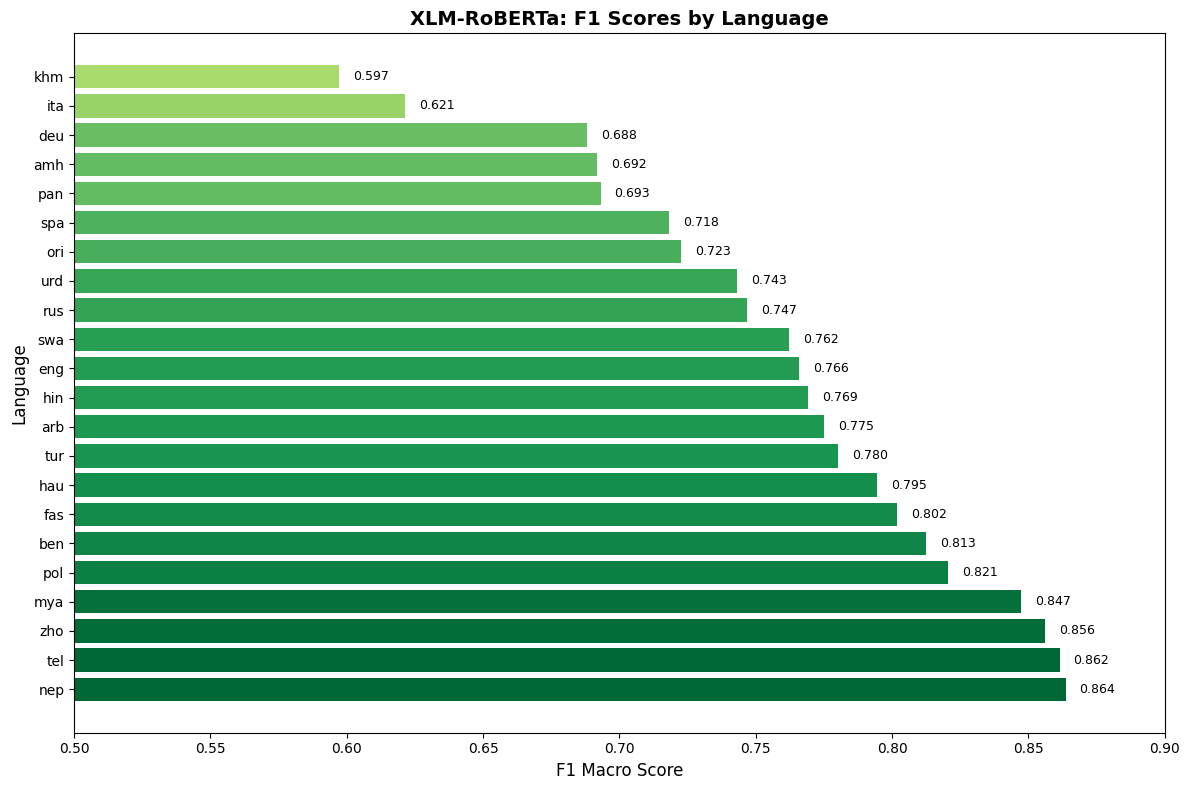

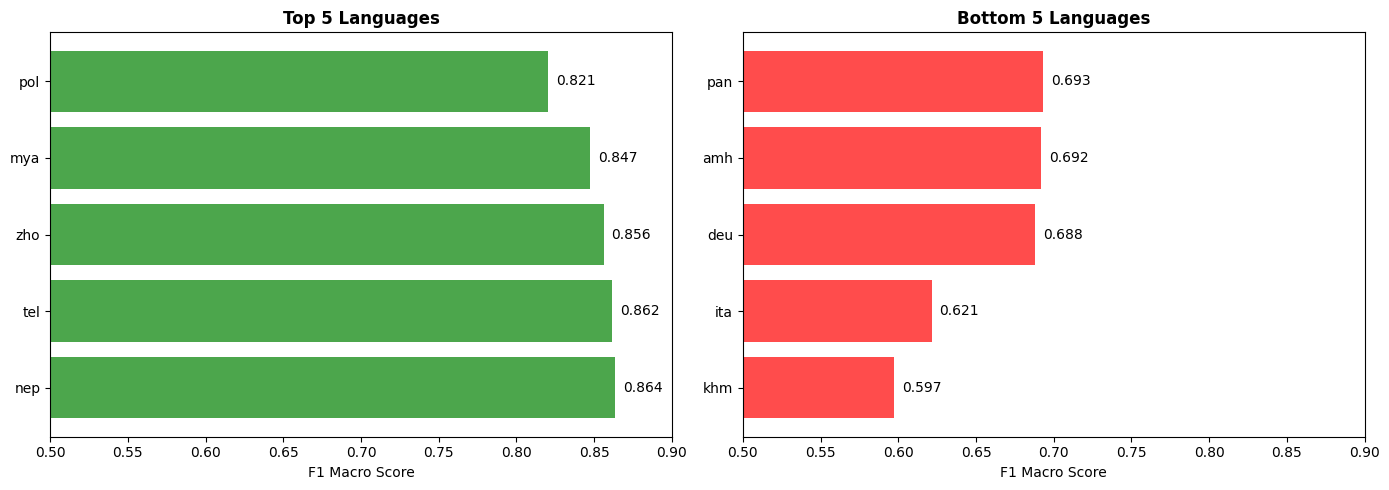

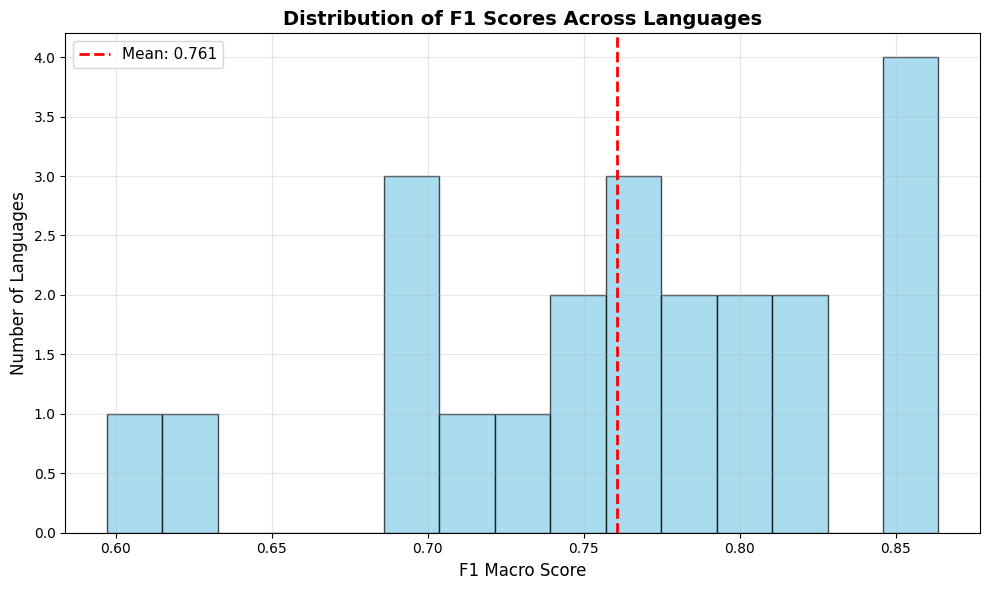

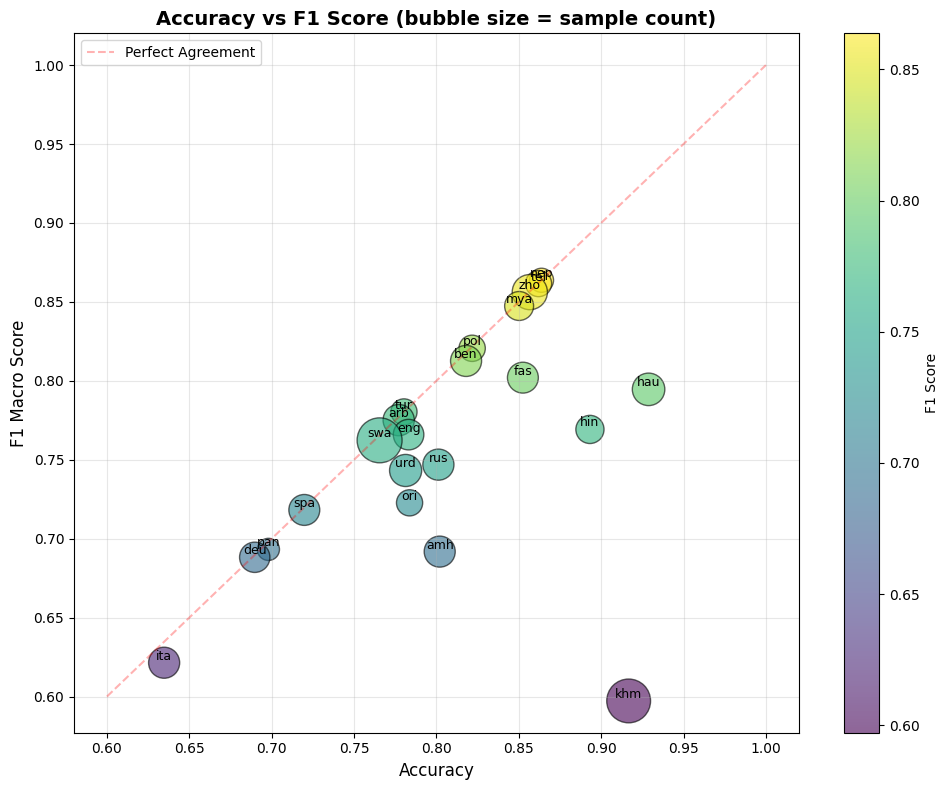


SUMMARY STATISTICS
Mean F1 Score:   0.7607
Median F1 Score: 0.7675
Std Deviation:   0.0729
Min F1 Score:    0.5972 (khm)
Max F1 Score:    0.8637 (nep)
Total Languages: 22
Total Samples:   11060


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

results_data = {
    'Language': ['nep', 'tel', 'zho', 'mya', 'pol', 'ben', 'fas', 'hau',
                 'tur', 'arb', 'hin', 'eng', 'swa', 'rus', 'urd', 'ori',
                 'spa', 'pan', 'amh', 'deu', 'ita', 'khm'],
    'F1_Macro': [0.8637, 0.8616, 0.8562, 0.8474, 0.8206, 0.8126, 0.8020, 0.7946,
                 0.7803, 0.7751, 0.7692, 0.7659, 0.7623, 0.7469, 0.7432, 0.7227,
                 0.7182, 0.6932, 0.6918, 0.6882, 0.6214, 0.5972],
    'Accuracy': [0.8638, 0.8620, 0.8567, 0.8502, 0.8217, 0.8180, 0.8525, 0.9288,
                 0.7803, 0.7771, 0.8932, 0.7831, 0.7655, 0.8012, 0.7813, 0.7837,
                 0.7198, 0.6980, 0.8020, 0.6897, 0.6347, 0.9167],
    'Samples': [301, 355, 642, 434, 359, 500, 495, 548,
                355, 507, 412, 484, 1049, 503, 535, 356,
                496, 255, 500, 477, 501, 996]
}

results_df = pd.DataFrame(results_data)

# ============================================================================
# Plot 1: F1 Scores Bar Chart
# ============================================================================
plt.figure(figsize=(12, 8))
data = results_df.sort_values('F1_Macro', ascending=False)
colors = plt.cm.RdYlGn(data['F1_Macro'] / data['F1_Macro'].max())
bars = plt.barh(range(len(data)), data['F1_Macro'], color=colors)

plt.yticks(range(len(data)), data['Language'])
plt.xlabel('F1 Macro Score', fontsize=12)
plt.ylabel('Language', fontsize=12)
plt.title('XLM-RoBERTa: F1 Scores by Language', fontsize=14, fontweight='bold')
plt.xlim(0.5, 0.9)

# Add value labels
for i, (score, lang) in enumerate(zip(data['F1_Macro'], data['Language'])):
    plt.text(score + 0.005, i, f'{score:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('f1_by_language.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# Plot 2: Top 5 vs Bottom 5
# ============================================================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

top5 = results_df.nlargest(5, 'F1_Macro')
bottom5 = results_df.nsmallest(5, 'F1_Macro')

ax1.barh(top5['Language'], top5['F1_Macro'], color='green', alpha=0.7)
ax1.set_xlabel('F1 Macro Score')
ax1.set_title('Top 5 Languages', fontweight='bold', fontsize=12)
ax1.set_xlim(0.5, 0.9)
for i, (lang, score) in enumerate(zip(top5['Language'], top5['F1_Macro'])):
    ax1.text(score + 0.005, i, f'{score:.3f}', va='center')

ax2.barh(bottom5['Language'], bottom5['F1_Macro'], color='red', alpha=0.7)
ax2.set_xlabel('F1 Macro Score')
ax2.set_title('Bottom 5 Languages', fontweight='bold', fontsize=12)
ax2.set_xlim(0.5, 0.9)
for i, (lang, score) in enumerate(zip(bottom5['Language'], bottom5['F1_Macro'])):
    ax2.text(score + 0.005, i, f'{score:.3f}', va='center')

plt.tight_layout()
plt.savefig('top_bottom_5.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# Plot 3: Performance Distribution
# ============================================================================
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(results_df['F1_Macro'], bins=15, edgecolor='black', alpha=0.7, color='skyblue')
mean_f1 = results_df['F1_Macro'].mean()
ax.axvline(mean_f1, color='red', linestyle='--', linewidth=2,
          label=f'Mean: {mean_f1:.3f}')
ax.set_xlabel('F1 Macro Score', fontsize=12)
ax.set_ylabel('Number of Languages', fontsize=12)
ax.set_title('Distribution of F1 Scores Across Languages', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('f1_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# Plot 4: Accuracy vs F1
# ============================================================================
plt.figure(figsize=(10, 8))
scatter = plt.scatter(results_df['Accuracy'], results_df['F1_Macro'],
                     s=results_df['Samples'], alpha=0.6,
                     c=results_df['F1_Macro'], cmap='viridis',
                     edgecolors='black', linewidth=1)

for idx, row in results_df.iterrows():
    plt.annotate(row['Language'],
                (row['Accuracy'], row['F1_Macro']),
                fontsize=9, ha='center', va='bottom')

plt.plot([0.6, 1], [0.6, 1], 'r--', alpha=0.3, label='Perfect Agreement')
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('F1 Macro Score', fontsize=12)
plt.title('Accuracy vs F1 Score (bubble size = sample count)',
         fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.colorbar(scatter, label='F1 Score')
plt.tight_layout()
plt.savefig('accuracy_vs_f1.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\n" + "="*70)
print("SUMMARY STATISTICS")
print("="*70)
print(f"Mean F1 Score:   {results_df['F1_Macro'].mean():.4f}")
print(f"Median F1 Score: {results_df['F1_Macro'].median():.4f}")
print(f"Std Deviation:   {results_df['F1_Macro'].std():.4f}")
print(f"Min F1 Score:    {results_df['F1_Macro'].min():.4f} ({results_df.loc[results_df['F1_Macro'].idxmin(), 'Language']})")
print(f"Max F1 Score:    {results_df['F1_Macro'].max():.4f} ({results_df.loc[results_df['F1_Macro'].idxmax(), 'Language']})")
print(f"Total Languages: {len(results_df)}")
print(f"Total Samples:   {results_df['Samples'].sum()}")
print("="*70)